In [3]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Load Data PPH

In [ ]:
file_path_pph = 'Dataset PPH 2013 until 2015.xlsx'

## Skor PPH

In [5]:
sheet_skor_pph = 'Skor PPH'

data_skor_pph = pd.read_excel(file_path_pph, sheet_name=sheet_skor_pph)
data_skor_pph

,Kelompok Pangan,Kalori,%,%AKE,Bobot,Skor Aktual,Skor AKE,Skor Maks,Gap Skor,Skor PPH,Tahun,Tanggal
0,Padi-padian,667.4,57.6,33.4,0.5,28.8,16.7,25.0,-8.3,16.7,2013,2013-01-01
1,Umbi-umbian,55.7,4.8,2.8,0.5,2.4,1.4,2.5,-1.1,1.4,2013,2013-01-02
2,Pangan Hewani,174.1,15.0,8.7,2.0,30.1,17.4,24.0,-6.6,17.4,2013,2013-01-03
3,Minyak dan Lemak,130.9,11.3,6.5,0.5,5.7,3.3,5.0,-1.7,3.3,2013,2013-01-04
4,Buah/Biji Berminyak,7.1,0.6,0.4,0.5,0.3,0.2,1.0,-0.8,0.2,2013,2013-01-05
5,Kacang-kacangan,51.4,4.4,2.6,2.0,8.9,5.1,10.0,-4.9,5.1,2013,2013-01-06
6,Gula,23.3,2.0,1.2,0.5,1.0,0.6,2.5,-1.9,0.6,2013,2013-01-07
7,Sayur dan Buah,94.9,8.2,4.7,5.0,41.0,23.7,30.0,-6.3,23.7,2013,2013-01-08
8,Lain-lain,2.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,2013,2013-01-09
9,Padi-padian,666.1,49.3,33.3,0.5,24.7,16.7,25.0,-8.3,16.7,2014,2014-01-01


## PPH2013

### Pola Konsumsi (2013)

In [6]:
sheet_pola_konsumsi_2013 = 'Pola Konsumsi (2013)'

data_pola_konsumsi_2013 = pd.read_excel(file_path_pph, sheet_name=sheet_pola_konsumsi_2013)
data_pola_konsumsi_2013

,Wilayah,Jenis Pangan,Kuantitas Pangan (g/kap/hr),Kuantitas Pangan kg/kap/thn,Kuantitas Pangan kkal/kap/hr,Kontribusi Energi (%),Sumber,Tahun,Tanggal
0,Desa Bawahan Pasar,Beras,180.2,65.8,648.6,87,Karbohidrat,2013,2013-01-01
1,Desa Bawahan Pasar,Jagung,4.3,1.6,11.9,1.6,Karbohidrat,2013,2013-01-01
2,Desa Bawahan Pasar,Terigu,12.1,4.4,44.3,6,Karbohidrat,2013,2013-01-01
3,Desa Bawahan Pasar,Ubi Kayu,23,8.4,25.2,3.4,Karbohidrat,2013,2013-01-01
4,Desa Bawahan Pasar,Ubi Jalar,9.8,3.6,10.3,1.4,Karbohidrat,2013,2013-01-01
...,...,...,...,...,...,...,...,...,...
1493,KABUPATEN BANJAR,Tomat masak,1.1,0.4,0,0,Vitamin dan Mineral,2013,2013-01-01
1494,KABUPATEN BANJAR,Tomat muda,-,-,-,-,Vitamin dan Mineral,2013,2013-01-01
1495,KABUPATEN BANJAR,Umbut kelapa,-,-,-,-,Vitamin dan Mineral,2013,2013-01-01
1496,KABUPATEN BANJAR,Umbut rotan,-,-,-,-,Vitamin dan Mineral,2013,2013-01-01


### Frekuensi Kelompok Pangan (2013)

In [7]:
sheet_frekuensi_pangan_2013 = 'Frekuensi Klmp Pangan (2013)'

data_frekuensi_pangan_2013 = pd.read_excel(file_path_pph, sheet_name=sheet_frekuensi_pangan_2013)
data_frekuensi_pangan_2013


,Nama Desa,< 3 kali,3 - 5 kali,6 - 10 kali,> 10 kali,Total,Jenis
0,Desa Bawahan Pasar,-,-,4,14,18,Sayur-Sayuran
1,Desa Mandi Kapau Timur,5,2,6,10,23,Sayur-Sayuran
2,Desa Sungai Besar,-,3,4,13,20,Sayur-Sayuran
3,Desa Tungkaran,-,2,6,12,20,Sayur-Sayuran
4,Desa Bincau Muara,-,1,8,7,16,Sayur-Sayuran
5,Desa Keladan Baru,4,4,6,12,26,Sayur-Sayuran
6,KABUPATEN BANJAR,9,12,34,68,123,Sayur-Sayuran
7,Desa Bawahan Pasar,17,11,11,1,40,Buah-Buahan
8,Desa Mandi Kapau Timur,23,1,16,-,40,Buah-Buahan
9,Desa Sungai Besar,10,13,15,2,40,Buah-Buahan


## PPH2014

### Pola Konsumsi (2014)

In [8]:
sheet_pola_konsumsi_2014 = 'Pola Konsumsi (2014)'

data_pola_konsumsi_2014 = pd.read_excel(file_path_pph, sheet_name=sheet_pola_konsumsi_2014)
data_pola_konsumsi_2014


,Wilayah,Jenis Pangan,Kuantitas Pangan (g/kap/hr),Kuantitas Pangan kg/kap/thn,Kuantitas Pangan kkal/kap/hr,Kontribusi Energi (%),Sumber,Tahun,Tanggal
0,Desa Bawahan Pasar,Beras,170.2,62.1,613,83.8,Karbohidrat,2014,2014-01-01
1,Desa Bawahan Pasar,Jagung,5.6,2.1,16,2.1,Karbohidrat,2014,2014-01-01
2,Desa Bawahan Pasar,Terigu,12.1,4.4,44,6.1,Karbohidrat,2014,2014-01-01
3,Desa Bawahan Pasar,Ubi Kayu,35.2,12.9,39,5.3,Karbohidrat,2014,2014-01-01
4,Desa Bawahan Pasar,Ubi Jalar,15.6,5.7,16,2.3,Karbohidrat,2014,2014-01-01
...,...,...,...,...,...,...,...,...,...
1493,KABUPATEN BANJAR,Tomat masak,1,0.4,0,0,Vitamin dan Mineral,2014,2014-01-01
1494,KABUPATEN BANJAR,Tomat muda,-,-,-,-,Vitamin dan Mineral,2014,2014-01-01
1495,KABUPATEN BANJAR,Umbut kelapa,-,-,-,-,Vitamin dan Mineral,2014,2014-01-01
1496,KABUPATEN BANJAR,Umbut rotan,-,-,-,-,Vitamin dan Mineral,2014,2014-01-01


### Frekuensi Kelompok Pangan (2014)

In [9]:
sheet_frekuensi_pangan_2014 = 'Frekuensi Klmp Pangan (2014)'

data_frekuensi_pangan_2014 = pd.read_excel(file_path_pph, sheet_name=sheet_frekuensi_pangan_2014)
data_frekuensi_pangan_2014

,Nama Desa,< 3 kali,3 - 5 kali,6 - 10 kali,> 10 kali,Total,Jenis
0,Desa Bawahan Pasar,-,-,2,7,9,Sayur-Sayuran
1,Desa Mandi Kapau Timur,-,-,4,4,8,Sayur-Sayuran
2,Desa Sungai Besar,-,-,1,3,4,Sayur-Sayuran
3,Desa Tungkaran,-,1,1,1,3,Sayur-Sayuran
4,Desa Bincau Muara,-,-,3,2,5,Sayur-Sayuran
5,Desa Keladan Baru,2,2,2,7,13,Sayur-Sayuran
6,KABUPATEN BANJAR,2,3,13,24,42,Sayur-Sayuran
7,Desa Bawahan Pasar,6,5,8,1,20,Buah-Buahan
8,Desa Mandi Kapau Timur,3,8,8,1,20,Buah-Buahan
9,Desa Sungai Besar,-,7,11,1,19,Buah-Buahan


## PPH2015

### Pola Konsumsi (2015)

In [10]:
sheet_pola_konsumsi_2015 = 'Pola Konsumsi (2015)'

data_pola_konsumsi_2015 = pd.read_excel(file_path_pph, sheet_name=sheet_pola_konsumsi_2015)
data_pola_konsumsi_2015

,Wilayah,Jenis Pangan,Kuantitas Pangan (g/kap/hr),Kuantitas Pangan kg/kap/thn,Kuantitas Pangan kkal/kap/hr,Kontribusi Energi (%),Sumber,Tahun,Tanggal
0,Desa Bawahan Pasar,Beras,156.2,57,562,75.5,Karbohidrat,2015,2015-01-01
1,Desa Bawahan Pasar,Jagung,7.2,2.6,20,2.7,Karbohidrat,2015,2015-01-01
2,Desa Bawahan Pasar,Terigu,10.7,3.9,39,5.3,Karbohidrat,2015,2015-01-01
3,Desa Bawahan Pasar,Ubi Kayu,39.8,14.5,44,5.9,Karbohidrat,2015,2015-01-01
4,Desa Bawahan Pasar,Ubi Jalar,56.9,20.8,60,8.1,Karbohidrat,2015,2015-01-01
...,...,...,...,...,...,...,...,...,...
1493,KABUPATEN BANJAR,Tomat masak,2.3,0.8,1,0,Vitamin dan Mineral,2015,2015-01-01
1494,KABUPATEN BANJAR,Tomat muda,0.1,0,0,0,Vitamin dan Mineral,2015,2015-01-01
1495,KABUPATEN BANJAR,Umbut kelapa,-,-,-,-,Vitamin dan Mineral,2015,2015-01-01
1496,KABUPATEN BANJAR,Umbut rotan,-,-,-,-,Vitamin dan Mineral,2015,2015-01-01


### Frekuensi Kelompok Pangan (2015)

In [11]:
sheet_frekuensi_pangan_2015 = 'Frekuensi Klmp Pangan (2015)'

data_frekuensi_pangan_2015 = pd.read_excel(file_path_pph, sheet_name=sheet_frekuensi_pangan_2015)
data_frekuensi_pangan_2015

,Nama Desa,< 3 kali,3 - 5 kali,6 - 10 kali,> 10 kali,Total,Jenis
0,Desa Bawahan Pasar,1,11,8,-,20,Sayur-Sayuran
1,Desa Mandi Kapau Timur,-,-,-,2,2,Sayur-Sayuran
2,Desa Sungai Besar,-,-,-,1,1,Sayur-Sayuran
3,Desa Tungkaran,-,1,1,1,3,Sayur-Sayuran
4,Desa Bincau Muara,-,-,2,2,4,Sayur-Sayuran
5,Desa Keladan Baru,-,3,2,8,13,Sayur-Sayuran
6,KABUPATEN BANJAR,1,15,13,14,43,Sayur-Sayuran
7,Desa Bawahan Pasar,1,11,8,-,20,Buah-Buahan
8,Desa Mandi Kapau Timur,4,6,8,2,20,Buah-Buahan
9,Desa Sungai Besar,1,8,10,-,19,Buah-Buahan


# Visual Data PPH (Konsumsi Energi)

## 1. Frekuensi Konsumsi Setiap Jenis

In [ ]:
# Load dataset dari tiga sheet berbeda
file_path = "Dataset PPH 2013 until 2015.xlsx"

# Membaca data dari sheet "Frekuensi Klmp Pangan (2013)", "Frekuensi Klmp Pangan (2014)", dan "Frekuensi Klmp Pangan (2015)"
sheets = {
    2013: "Frekuensi Klmp Pangan (2013)",
    2014: "Frekuensi Klmp Pangan (2014)",
    2015: "Frekuensi Klmp Pangan (2015)"
}

Jenis: Sayur-Sayuran, Desa: Desa Bawahan Pasar, Nilai Frekuensi: [0.0, 0.0, 4.0, 14.0, 0.0, 0.0, 2.0, 7.0, 1.0, 11.0, 8.0, 0.0]
Jenis: Sayur-Sayuran, Desa: Desa Mandi Kapau Timur, Nilai Frekuensi: [5.0, 2.0, 6.0, 10.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 2.0]
Jenis: Sayur-Sayuran, Desa: Desa Sungai Besar, Nilai Frekuensi: [0.0, 3.0, 4.0, 13.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 1.0]
Jenis: Sayur-Sayuran, Desa: Desa Tungkaran, Nilai Frekuensi: [0.0, 2.0, 6.0, 12.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
Jenis: Sayur-Sayuran, Desa: Desa Bincau Muara, Nilai Frekuensi: [0.0, 1.0, 8.0, 7.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 2.0, 2.0]
Jenis: Sayur-Sayuran, Desa: Desa Keladan Baru, Nilai Frekuensi: [4.0, 4.0, 6.0, 12.0, 2.0, 2.0, 2.0, 7.0, 0.0, 3.0, 2.0, 8.0]
Jenis: Sayur-Sayuran, Desa: KABUPATEN BANJAR, Nilai Frekuensi: [9.0, 12.0, 34.0, 68.0, 2.0, 3.0, 13.0, 24.0, 1.0, 15.0, 13.0, 14.0]


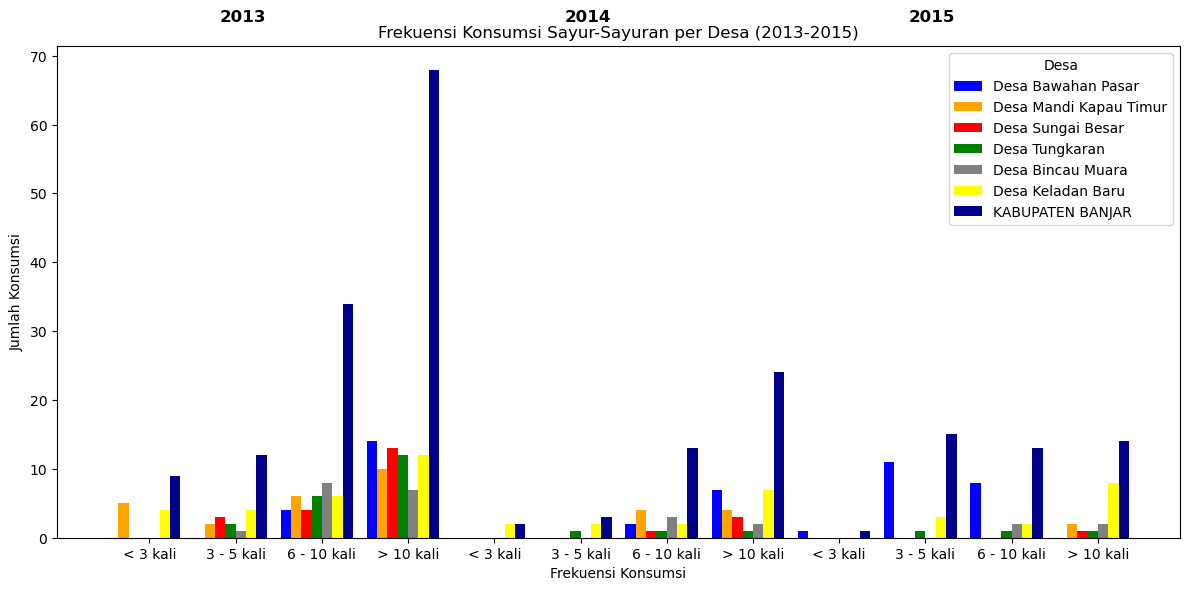

Jenis: Buah-Buahan, Desa: Desa Bawahan Pasar, Nilai Frekuensi: [17.0, 11.0, 11.0, 1.0, 6.0, 5.0, 8.0, 1.0, 1.0, 11.0, 8.0, 0.0]
Jenis: Buah-Buahan, Desa: Desa Mandi Kapau Timur, Nilai Frekuensi: [23.0, 1.0, 16.0, 0.0, 3.0, 8.0, 8.0, 1.0, 4.0, 6.0, 8.0, 2.0]
Jenis: Buah-Buahan, Desa: Desa Sungai Besar, Nilai Frekuensi: [10.0, 13.0, 15.0, 2.0, 0.0, 7.0, 11.0, 1.0, 1.0, 8.0, 10.0, 0.0]
Jenis: Buah-Buahan, Desa: Desa Tungkaran, Nilai Frekuensi: [15.0, 17.0, 8.0, 0.0, 5.0, 10.0, 5.0, 0.0, 0.0, 13.0, 7.0, 0.0]
Jenis: Buah-Buahan, Desa: Desa Bincau Muara, Nilai Frekuensi: [10.0, 25.0, 5.0, 0.0, 1.0, 12.0, 7.0, 0.0, 1.0, 11.0, 8.0, 0.0]
Jenis: Buah-Buahan, Desa: Desa Keladan Baru, Nilai Frekuensi: [28.0, 12.0, 0.0, 0.0, 13.0, 6.0, 1.0, 0.0, 11.0, 8.0, 1.0, 0.0]
Jenis: Buah-Buahan, Desa: KABUPATEN BANJAR, Nilai Frekuensi: [103.0, 79.0, 55.0, 3.0, 28.0, 48.0, 40.0, 3.0, 18.0, 57.0, 42.0, 2.0]


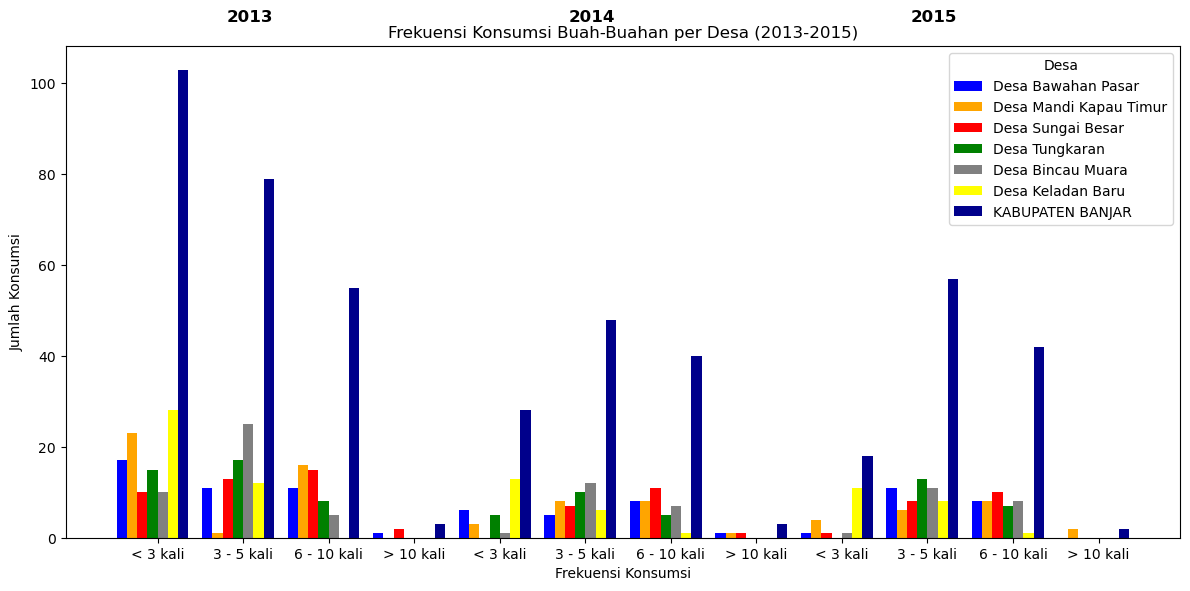

Jenis: Umbi-Umbian, Desa: Desa Bawahan Pasar, Nilai Frekuensi: [12.0, 14.0, 11.0, 1.0, 5.0, 7.0, 6.0, 1.0, 10.0, 7.0, 3.0, 0.0]
Jenis: Umbi-Umbian, Desa: Desa Mandi Kapau Timur, Nilai Frekuensi: [24.0, 13.0, 3.0, 0.0, 14.0, 5.0, 1.0, 0.0, 14.0, 5.0, 1.0, 0.0]
Jenis: Umbi-Umbian, Desa: Desa Sungai Besar, Nilai Frekuensi: [18.0, 12.0, 10.0, 0.0, 2.0, 12.0, 6.0, 0.0, 3.0, 10.0, 6.0, 1.0]
Jenis: Umbi-Umbian, Desa: Desa Tungkaran, Nilai Frekuensi: [19.0, 19.0, 2.0, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0, 18.0, 2.0, 0.0]
Jenis: Umbi-Umbian, Desa: Desa Bincau Muara, Nilai Frekuensi: [18.0, 22.0, 0.0, 0.0, 1.0, 17.0, 2.0, 0.0, 1.0, 16.0, 3.0, 0.0]
Jenis: Umbi-Umbian, Desa: Desa Keladan Baru, Nilai Frekuensi: [30.0, 8.0, 2.0, 0.0, 13.0, 6.0, 1.0, 0.0, 9.0, 10.0, 1.0, 0.0]
Jenis: Umbi-Umbian, Desa: KABUPATEN BANJAR, Nilai Frekuensi: [121.0, 88.0, 28.0, 1.0, 45.0, 57.0, 16.0, 1.0, 37.0, 66.0, 16.0, 1.0]


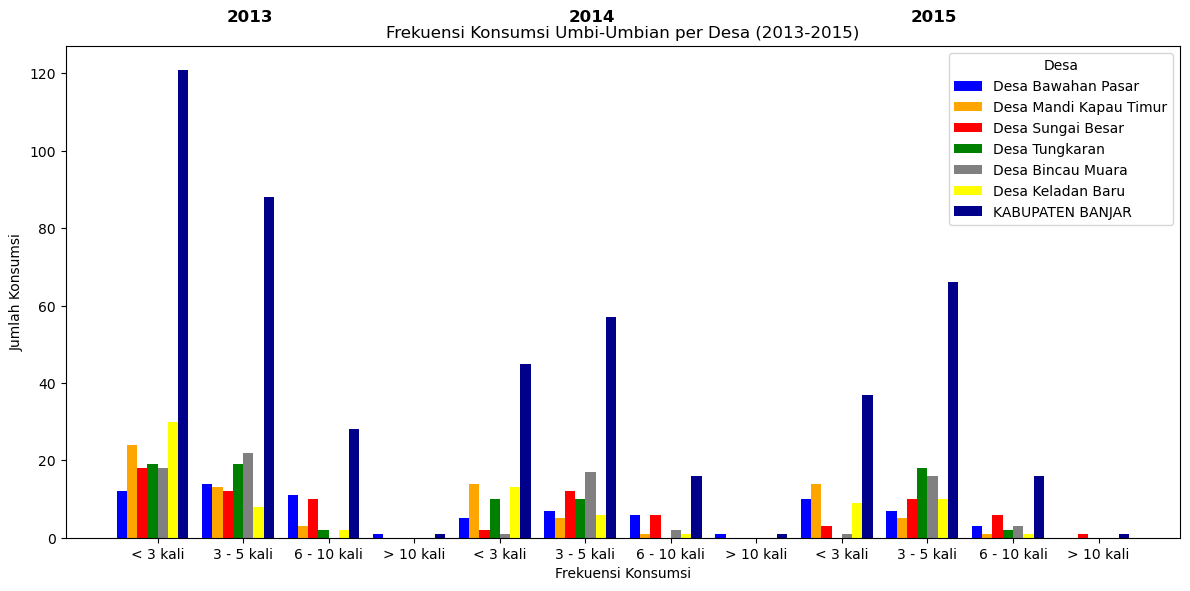

Jenis: Pangan Hewani, Desa: Desa Bawahan Pasar, Nilai Frekuensi: [0.0, 0.0, 6.0, 2.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 4.0, 4.0]
Jenis: Pangan Hewani, Desa: Desa Mandi Kapau Timur, Nilai Frekuensi: [1.0, 0.0, 5.0, 4.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 6.0]
Jenis: Pangan Hewani, Desa: Desa Sungai Besar, Nilai Frekuensi: [0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 2.0, 7.0, 0.0, 0.0, 2.0, 6.0]
Jenis: Pangan Hewani, Desa: Desa Tungkaran, Nilai Frekuensi: [0.0, 8.0, 12.0, 8.0, 0.0, 3.0, 4.0, 4.0, 0.0, 1.0, 4.0, 6.0]
Jenis: Pangan Hewani, Desa: Desa Bincau Muara, Nilai Frekuensi: [0.0, 2.0, 8.0, 4.0, 0.0, 1.0, 1.0, 5.0, 0.0, 1.0, 1.0, 6.0]
Jenis: Pangan Hewani, Desa: Desa Keladan Baru, Nilai Frekuensi: [0.0, 0.0, 2.0, 18.0, 0.0, 0.0, 1.0, 8.0, 0.0, 0.0, 0.0, 9.0]
Jenis: Pangan Hewani, Desa: KABUPATEN BANJAR, Nilai Frekuensi: [1.0, 10.0, 37.0, 48.0, 0.0, 4.0, 12.0, 27.0, 0.0, 2.0, 11.0, 37.0]


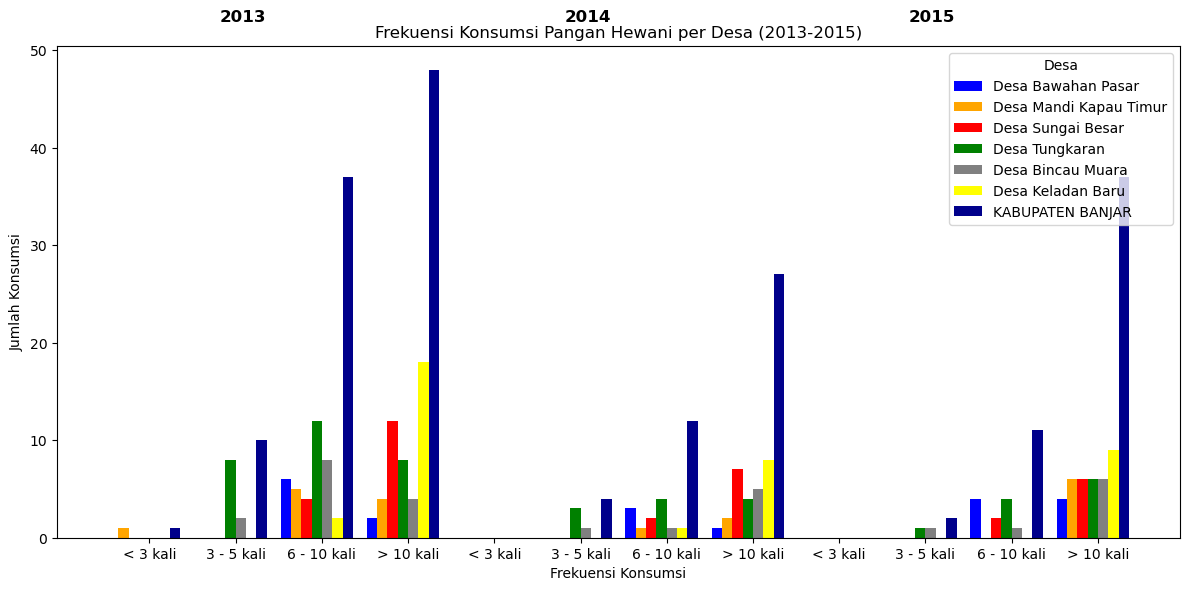

Jenis: Kacang-Kacangan, Desa: Desa Bawahan Pasar, Nilai Frekuensi: [8.0, 7.0, 24.0, 1.0, 3.0, 4.0, 12.0, 1.0, 3.0, 10.0, 6.0, 1.0]
Jenis: Kacang-Kacangan, Desa: Desa Mandi Kapau Timur, Nilai Frekuensi: [18.0, 12.0, 10.0, 0.0, 5.0, 10.0, 4.0, 1.0, 6.0, 10.0, 4.0, 0.0]
Jenis: Kacang-Kacangan, Desa: Desa Sungai Besar, Nilai Frekuensi: [4.0, 22.0, 13.0, 1.0, 0.0, 6.0, 12.0, 2.0, 0.0, 6.0, 13.0, 1.0]
Jenis: Kacang-Kacangan, Desa: Desa Tungkaran, Nilai Frekuensi: [9.0, 31.0, 0.0, 0.0, 5.0, 13.0, 2.0, 0.0, 0.0, 7.0, 12.0, 1.0]
Jenis: Kacang-Kacangan, Desa: Desa Bincau Muara, Nilai Frekuensi: [7.0, 32.0, 1.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 12.0, 8.0, 0.0]
Jenis: Kacang-Kacangan, Desa: Desa Keladan Baru, Nilai Frekuensi: [28.0, 8.0, 4.0, 0.0, 13.0, 5.0, 2.0, 0.0, 11.0, 6.0, 3.0, 0.0]
Jenis: Kacang-Kacangan, Desa: KABUPATEN BANJAR, Nilai Frekuensi: [74.0, 112.0, 52.0, 2.0, 26.0, 50.0, 40.0, 4.0, 20.0, 51.0, 46.0, 3.0]


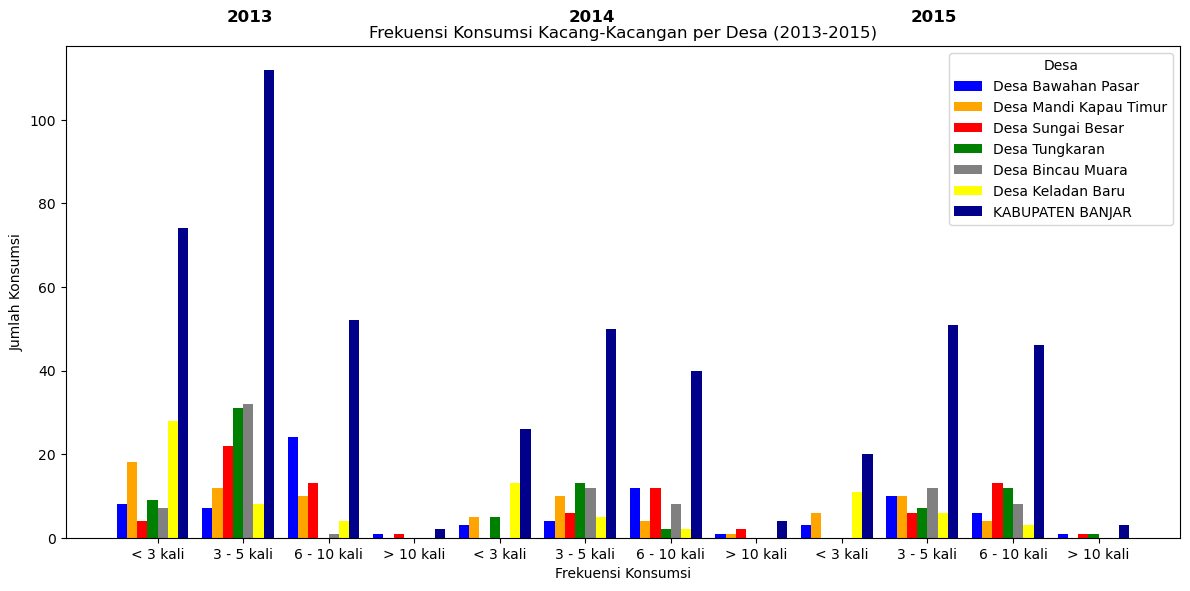

In [13]:
# Menggabungkan data dari semua sheet
df_list = []
for year, sheet_name in sheets.items():
    df_temp = pd.read_excel(file_path, sheet_name=sheet_name)
    df_temp["Tahun"] = year  # Tambahkan kolom tahun untuk identifikasi
    df_list.append(df_temp)

# Gabungkan semua data menjadi satu dataframe
df = pd.concat(df_list, ignore_index=True)

# Ubah bentuk tabel dari lebar ke panjang (melt)
df_melted = df.melt(id_vars=["Nama Desa", "Total", "Jenis", "Tahun"], 
                     value_vars=["< 3 kali", "3 - 5 kali", "6 - 10 kali", "> 10 kali"],
                     var_name="Kategori Frekuensi",
                     value_name="Jumlah Konsumsi")

# Konversi nilai "-" menjadi angka 0
df_melted["Jumlah Konsumsi"] = df_melted["Jumlah Konsumsi"].replace("-", 0)
df_melted["Jumlah Konsumsi"] = pd.to_numeric(df_melted["Jumlah Konsumsi"], errors="coerce").fillna(0)

# Jenis makanan yang ingin divisualisasikan
jenis_makanan = df_melted["Jenis"].unique()

# Warna untuk setiap desa
warna_desa = {
    "Desa Bawahan Pasar": "blue",
    "Desa Mandi Kapau Timur": "orange",
    "Desa Sungai Besar": "red",
    "Desa Tungkaran": "green",
    "Desa Bincau Muara": "gray",
    "Desa Keladan Baru": "yellow",
    "KABUPATEN BANJAR": "darkblue"
}

# Kategori frekuensi konsumsi
kategori_frekuensi = ["< 3 kali", "3 - 5 kali", "6 - 10 kali", "> 10 kali"]
tahun = [2013, 2014, 2015]

# Membuat visualisasi untuk setiap jenis makanan
for jenis in jenis_makanan:
    df_jenis = df_melted[df_melted["Jenis"] == jenis]

    # Setup visualisasi
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.12  # Lebar setiap batang grafik
    ind = np.arange(len(kategori_frekuensi) * len(tahun))  # Index untuk kategori frekuensi

    # Plot setiap desa
    for i, desa in enumerate(warna_desa.keys()):
        nilai_frekuensi = []
        
        for t in tahun:
            for k in kategori_frekuensi:
                nilai = df_jenis[
                    (df_jenis["Tahun"] == t) & 
                    (df_jenis["Kategori Frekuensi"] == k) & 
                    (df_jenis["Nama Desa"] == desa)
                ]["Jumlah Konsumsi"].sum()
                nilai_frekuensi.append(float(nilai))  # Pastikan semua nilai dalam float

        # Debug: Cetak nilai_frekuensi sebelum plotting
        print(f"Jenis: {jenis}, Desa: {desa}, Nilai Frekuensi: {nilai_frekuensi}")

        # Pastikan jumlah nilai_frekuensi cocok dengan panjang ind
        if len(nilai_frekuensi) == len(ind):
            ax.bar(ind + i * width, nilai_frekuensi, width, label=desa, color=warna_desa[desa])
        else:
            print(f"⚠️ ERROR: Panjang nilai_frekuensi ({len(nilai_frekuensi)}) tidak sesuai dengan panjang ind ({len(ind)}) untuk desa {desa}")

    # Menyesuaikan sumbu x
    ax.set_xticks(ind + (len(warna_desa) / 2) * width)
    ax.set_xticklabels(kategori_frekuensi * len(tahun), rotation=0, ha="center")

    # # Tambahkan garis pemisah antar tahun
    # for i in range(1, len(tahun)):
    #     plt.axvline(x=i * len(kategori_frekuensi) - 0.5, color="black", linestyle="--", linewidth=0.8)

    # Tambahkan label tahun di atas kelompok frekuensi
    for i, t in enumerate(tahun):
        x_pos = (i * len(kategori_frekuensi) + (i + 1) * len(kategori_frekuensi) - 1) / 2
        ax.text(x_pos, ax.get_ylim()[1] * 1.05, str(t), ha="center", fontsize=12, fontweight="bold")

    # Menambahkan label dan judul
    ax.set_xlabel("Frekuensi Konsumsi")
    ax.set_ylabel("Jumlah Konsumsi")
    ax.set_title(f"Frekuensi Konsumsi {jenis} per Desa (2013-2015)")

    # Menambahkan legenda
    ax.legend(title="Desa", loc="upper right")

    # Tampilkan plot
    plt.tight_layout()
    plt.show()


## 2. Total Konsumsi Energi Per Tahun

In [14]:
# Mengonversi kolom "Kuantitas Pangan kkal/kap/hr" ke numerik
data_pola_konsumsi_2013["Kuantitas Pangan kkal/kap/hr"] = pd.to_numeric(data_pola_konsumsi_2013["Kuantitas Pangan kkal/kap/hr"], errors="coerce")
data_pola_konsumsi_2014["Kuantitas Pangan kkal/kap/hr"] = pd.to_numeric(data_pola_konsumsi_2014["Kuantitas Pangan kkal/kap/hr"], errors="coerce")
data_pola_konsumsi_2015["Kuantitas Pangan kkal/kap/hr"] = pd.to_numeric(data_pola_konsumsi_2015["Kuantitas Pangan kkal/kap/hr"], errors="coerce")

# Menggabungkan kembali data dari semua tahun
df_all = pd.concat([data_pola_konsumsi_2013, data_pola_konsumsi_2014, data_pola_konsumsi_2015])

# Memastikan kolom "Tahun" berupa integer
df_all["Tahun"] = df_all["Tahun"].astype(int)

# df_all["Kuantitas Pangan kkal/kap/hr"] = df_all["Kuantitas Pangan kkal/kap/hr"].fillna(0)

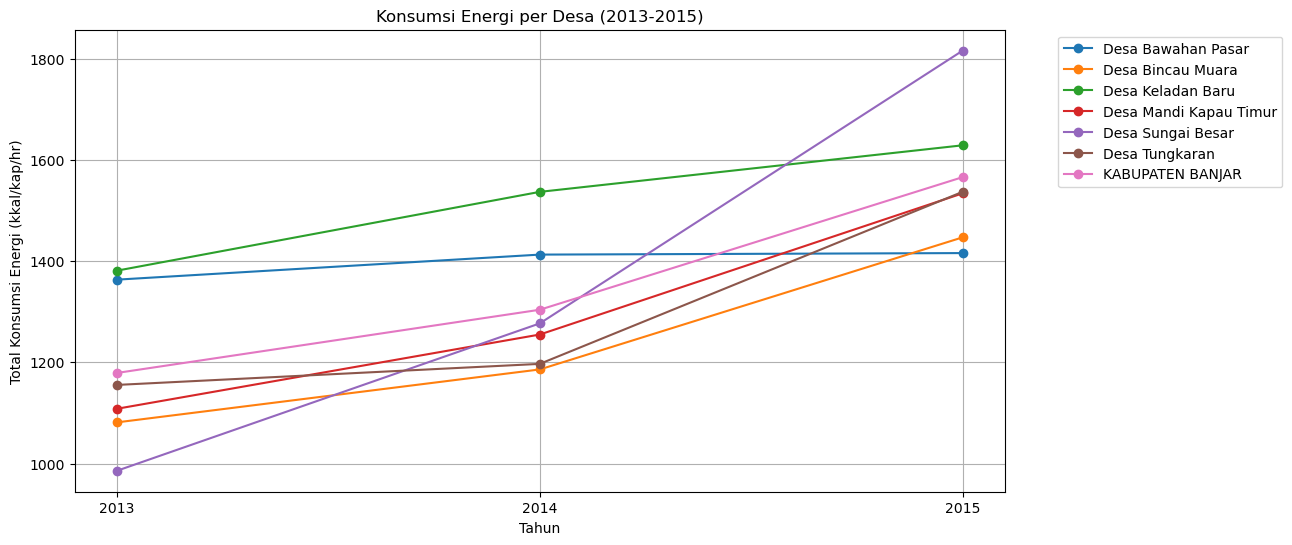

In [15]:
# Menghitung ulang total konsumsi energi per desa per tahun
df_energy = df_all.groupby(["Wilayah", "Tahun"])["Kuantitas Pangan kkal/kap/hr"].sum().reset_index()

# Visualisasi ulang
plt.figure(figsize=(12, 6))
for desa in df_energy["Wilayah"].unique():
    subset = df_energy[df_energy["Wilayah"] == desa]
    plt.plot(subset["Tahun"], subset["Kuantitas Pangan kkal/kap/hr"], marker="o", label=desa)

plt.xlabel("Tahun")
plt.ylabel("Total Konsumsi Energi (kkal/kap/hr)")
plt.title("Konsumsi Energi per Desa (2013-2015)")
plt.xticks([2013, 2014, 2015])  # Memastikan hanya tahun yang valid ditampilkan
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [16]:
df_energy

,Wilayah,Tahun,Kuantitas Pangan kkal/kap/hr
0,Desa Bawahan Pasar,2013,1363.5
1,Desa Bawahan Pasar,2014,1413.0
2,Desa Bawahan Pasar,2015,1416.0
3,Desa Bincau Muara,2013,1081.4
4,Desa Bincau Muara,2014,1186.0
5,Desa Bincau Muara,2015,1447.0
6,Desa Keladan Baru,2013,1381.3
7,Desa Keladan Baru,2014,1537.0
8,Desa Keladan Baru,2015,1629.0
9,Desa Mandi Kapau Timur,2013,1108.3


Dari total konsumsi energi....

Jika ditelusuri lebih dalam, maka dapat dilihat bahwa berdasarkan sumber ......

## 3. Konsumsi Energi Berdasarkan Sumber di Setiap Desa (2013 - 2015)

In [17]:
# # Mengelompokkan data berdasarkan sumber pangan, desa, dan tahun
# df_sumber = df_all.groupby(["Wilayah", "Tahun", "Sumber"])["Kuantitas Pangan kkal/kap/hr"].sum().reset_index()

# # Membuat facet grid untuk visualisasi per desa berdasarkan sumber pangan
# g = sns.FacetGrid(df_sumber, col="Wilayah", col_wrap=3, height=4, sharey=False)
# g.map_dataframe(sns.barplot, x="Tahun", y="Kuantitas Pangan kkal/kap/hr", hue="Sumber", errorbar=None)

# # Menyesuaikan tampilan
# g.set_axis_labels("Tahun", "Total Konsumsi Energi (kkal/kap/hr)")
# g.set_titles(col_template="{col_name}")
# g.add_legend(title="Sumber Pangan")

# plt.show()

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


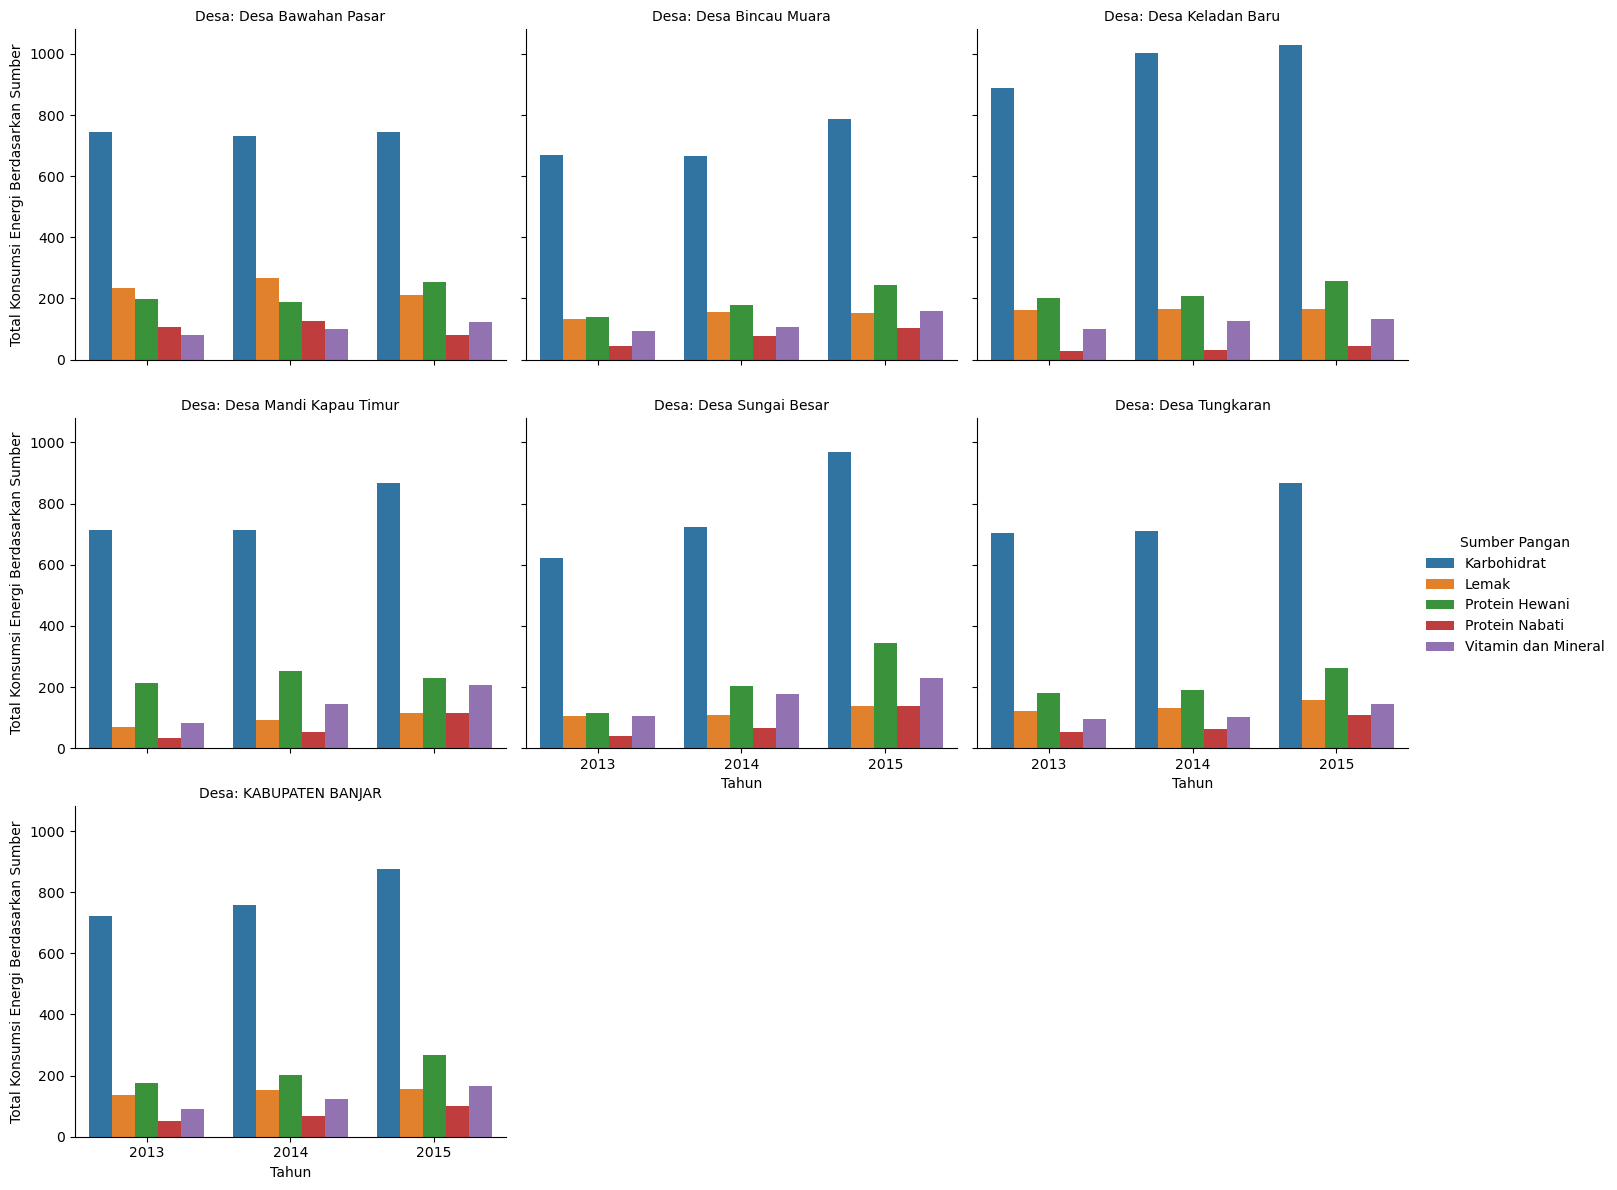

In [18]:
df_with_sumber = df_all.groupby(["Wilayah", "Tahun", "Sumber"])["Kuantitas Pangan kkal/kap/hr"].sum().reset_index()

# Membuat facet grid untuk memvisualisasikan konsumsi energi berdasarkan sumber pangan di setiap desa
g = sns.catplot(
    data=df_with_sumber,
    x="Tahun",
    y="Kuantitas Pangan kkal/kap/hr",
    hue="Sumber",
    col="Wilayah",  # Setiap desa memiliki subplot sendiri
    kind="bar",
    col_wrap=3,  # Menyesuaikan jumlah kolom agar tidak terlalu panjang
    height=4,
    aspect=1.2
)

g.set_axis_labels("Tahun", "Total Konsumsi Energi Berdasarkan Sumber")
g.set_titles("Desa: {col_name}")
g.legend.set_title("Sumber Pangan")
plt.show()


### Tabel

#### 2013

In [19]:
df_2013 = df_with_sumber[df_with_sumber["Tahun"] == 2013]
df_2013

,Wilayah,Tahun,Sumber,Kuantitas Pangan kkal/kap/hr
0,Desa Bawahan Pasar,2013,Karbohidrat,744.5
1,Desa Bawahan Pasar,2013,Lemak,235.0
2,Desa Bawahan Pasar,2013,Protein Hewani,198.0
3,Desa Bawahan Pasar,2013,Protein Nabati,107.0
4,Desa Bawahan Pasar,2013,Vitamin dan Mineral,79.0
15,Desa Bincau Muara,2013,Karbohidrat,669.4
16,Desa Bincau Muara,2013,Lemak,134.0
17,Desa Bincau Muara,2013,Protein Hewani,140.0
18,Desa Bincau Muara,2013,Protein Nabati,44.0
19,Desa Bincau Muara,2013,Vitamin dan Mineral,94.0


#### 2014

In [20]:
df_2014 = df_with_sumber[df_with_sumber["Tahun"] == 2014]
df_2014

,Wilayah,Tahun,Sumber,Kuantitas Pangan kkal/kap/hr
5,Desa Bawahan Pasar,2014,Karbohidrat,731.0
6,Desa Bawahan Pasar,2014,Lemak,267.0
7,Desa Bawahan Pasar,2014,Protein Hewani,188.0
8,Desa Bawahan Pasar,2014,Protein Nabati,126.0
9,Desa Bawahan Pasar,2014,Vitamin dan Mineral,101.0
20,Desa Bincau Muara,2014,Karbohidrat,666.0
21,Desa Bincau Muara,2014,Lemak,156.0
22,Desa Bincau Muara,2014,Protein Hewani,180.0
23,Desa Bincau Muara,2014,Protein Nabati,78.0
24,Desa Bincau Muara,2014,Vitamin dan Mineral,106.0


#### 2015

In [21]:
df_2015 = df_with_sumber[df_with_sumber["Tahun"] == 2015]
# df_2015_sorted = df_2015.sort_values(by="Kuantitas Pangan kkal/kap/hr", ascending=False)
# df_2015_sorted
df_2015

,Wilayah,Tahun,Sumber,Kuantitas Pangan kkal/kap/hr
10,Desa Bawahan Pasar,2015,Karbohidrat,744.0
11,Desa Bawahan Pasar,2015,Lemak,212.0
12,Desa Bawahan Pasar,2015,Protein Hewani,255.0
13,Desa Bawahan Pasar,2015,Protein Nabati,82.0
14,Desa Bawahan Pasar,2015,Vitamin dan Mineral,123.0
25,Desa Bincau Muara,2015,Karbohidrat,787.0
26,Desa Bincau Muara,2015,Lemak,153.0
27,Desa Bincau Muara,2015,Protein Hewani,244.0
28,Desa Bincau Muara,2015,Protein Nabati,105.0
29,Desa Bincau Muara,2015,Vitamin dan Mineral,158.0


## 4. Konsumsi Energi Berdasarkan Jenis Pangan di Setiap Desa (2013-2015)

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


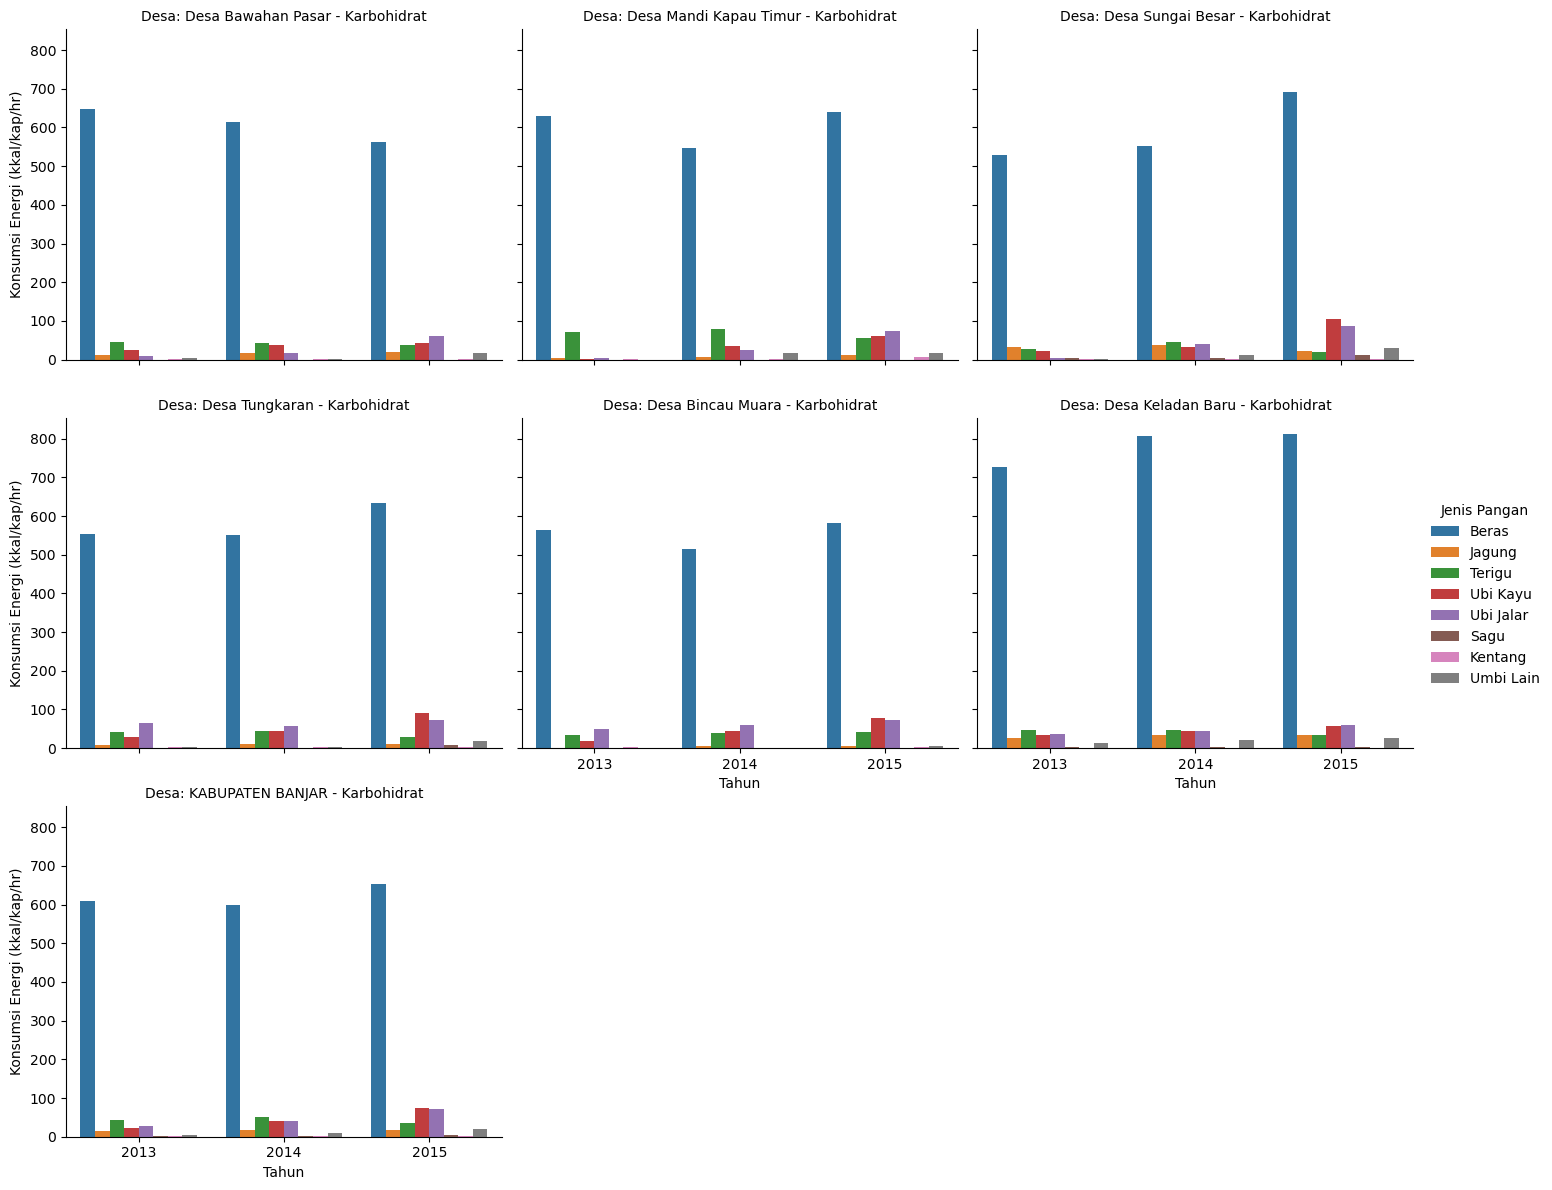

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


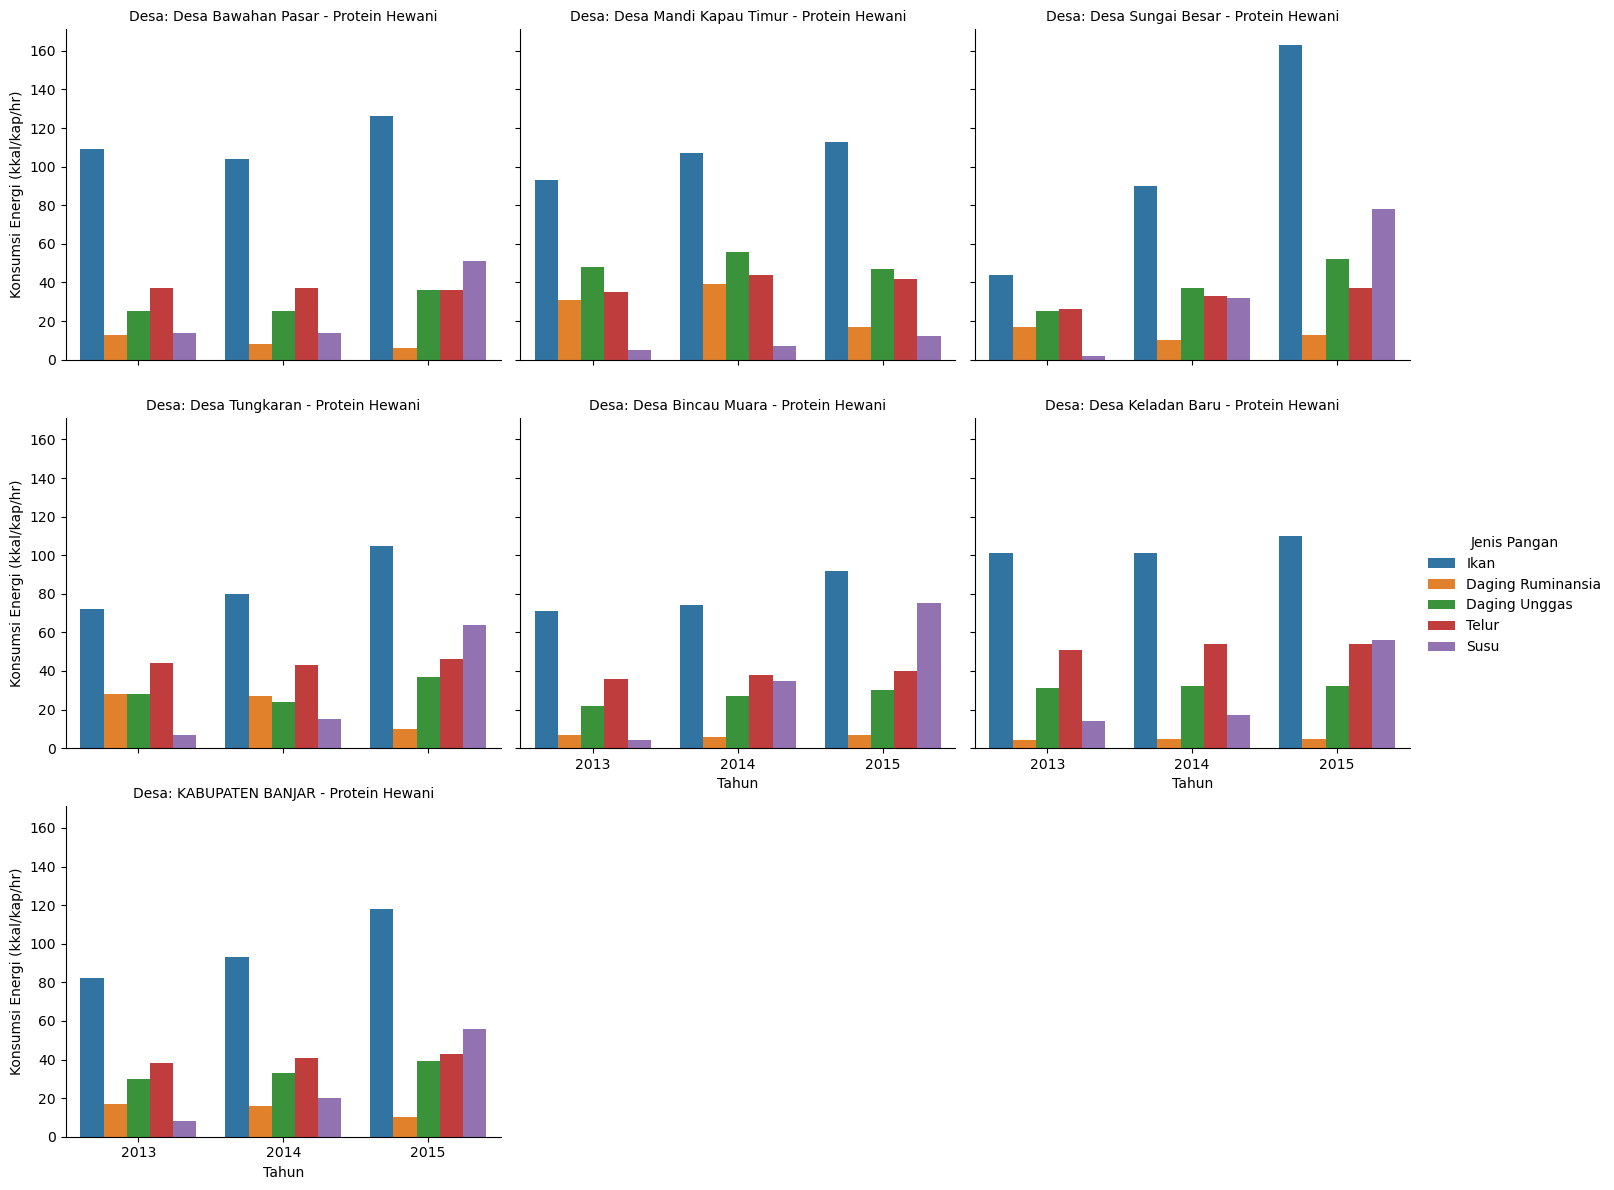

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


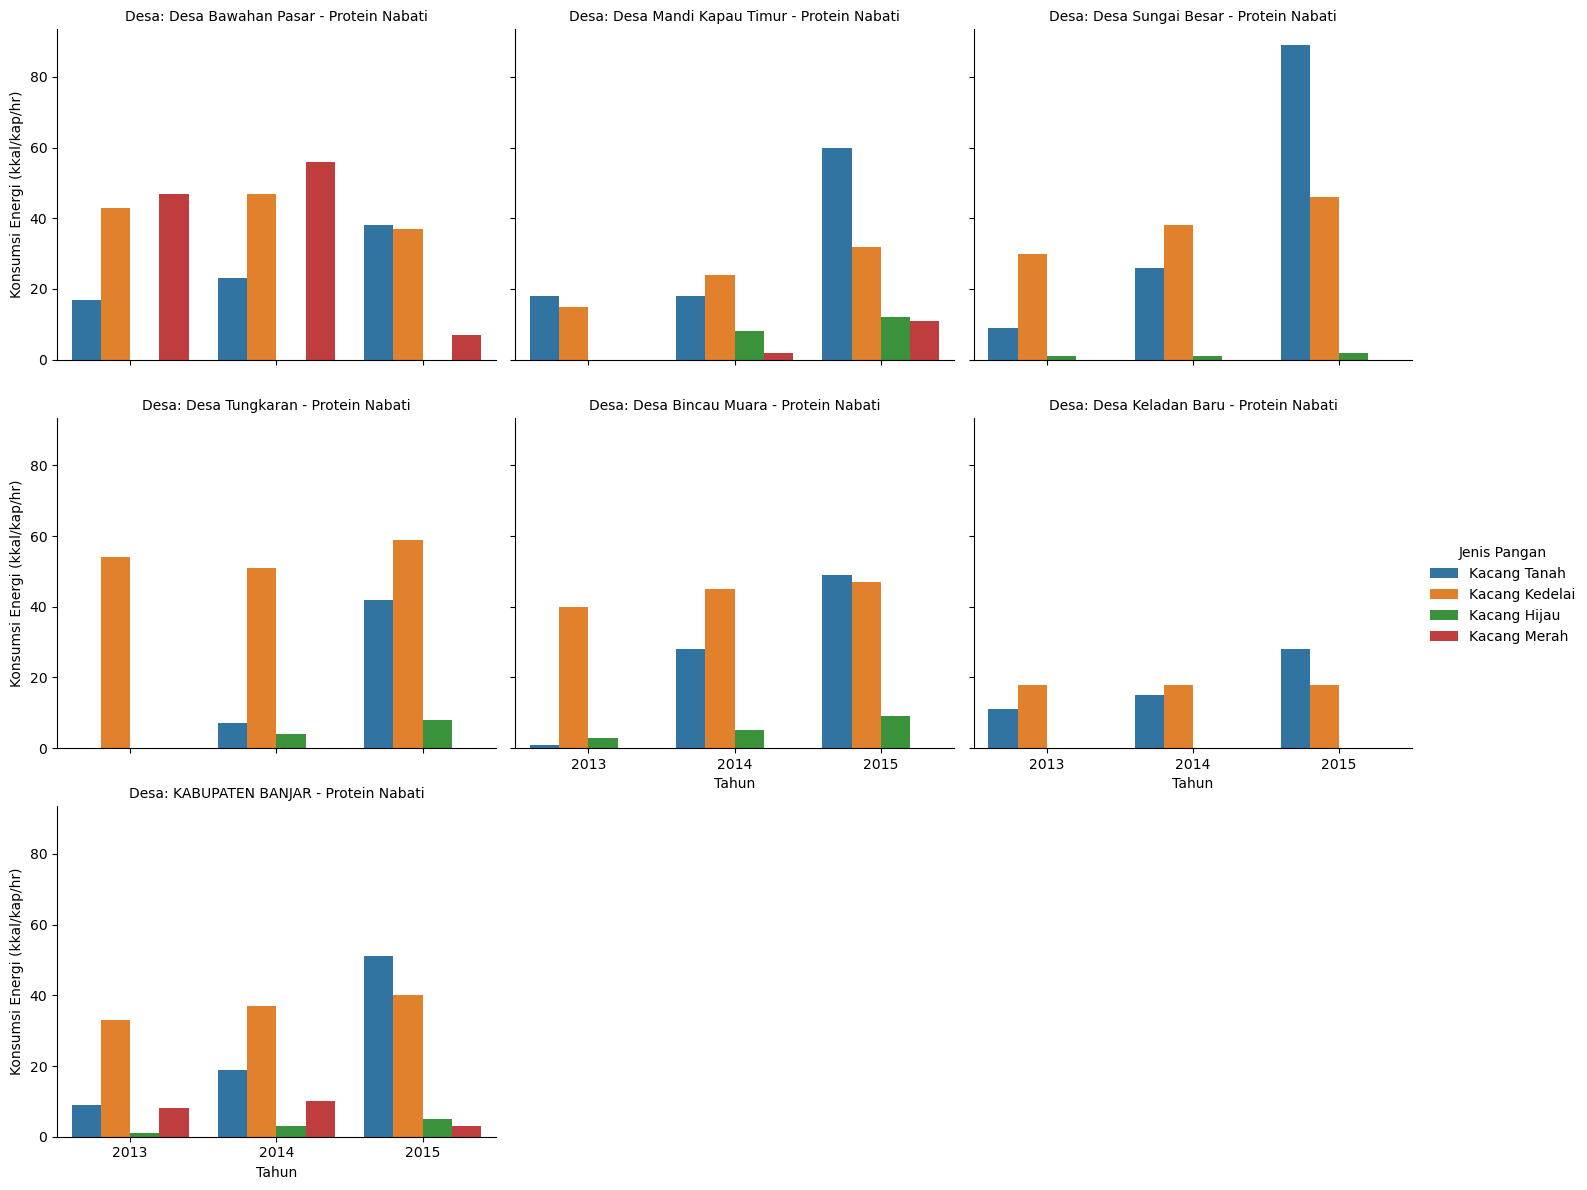

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


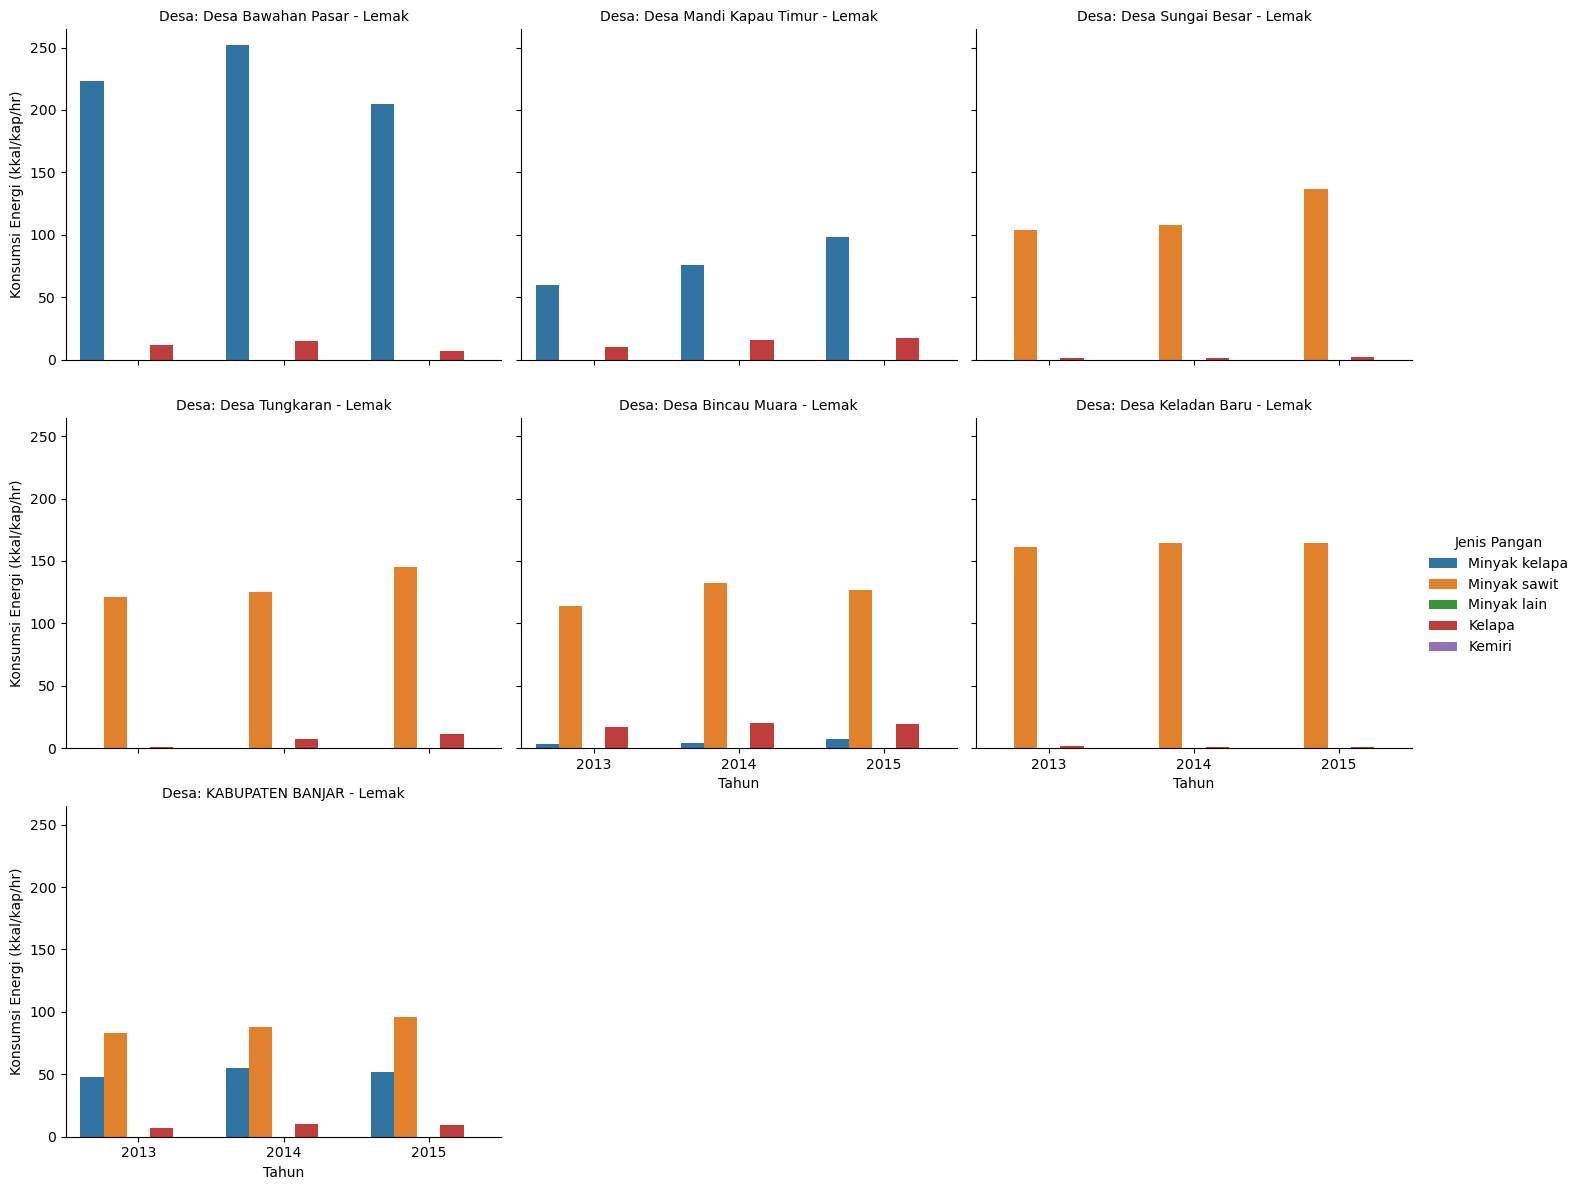

In [22]:
max_legends = 10

for sumber in df_all["Sumber"].unique():
    df_subset = df_all[df_all["Sumber"] == sumber]

    # Mengecek jumlah kategori dalam "Jenis Pangan"
    if df_subset["Jenis Pangan"].nunique() <= max_legends:
        g = sns.catplot(
            data=df_subset,
            x="Tahun",
            y="Kuantitas Pangan kkal/kap/hr",
            hue="Jenis Pangan",
            col="Wilayah",  # Setiap desa memiliki subplot sendiri
            kind="bar",
            col_wrap=3,  # Menyesuaikan jumlah kolom agar tidak terlalu panjang
            height=4,
            aspect=1.2,
            errorbar=None
        )

        g.set_axis_labels("Tahun", "Konsumsi Energi (kkal/kap/hr)")
        g.set_titles(f"Desa: {{col_name}} - {sumber}")
        g.legend.set_title("Jenis Pangan")
        plt.show()

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


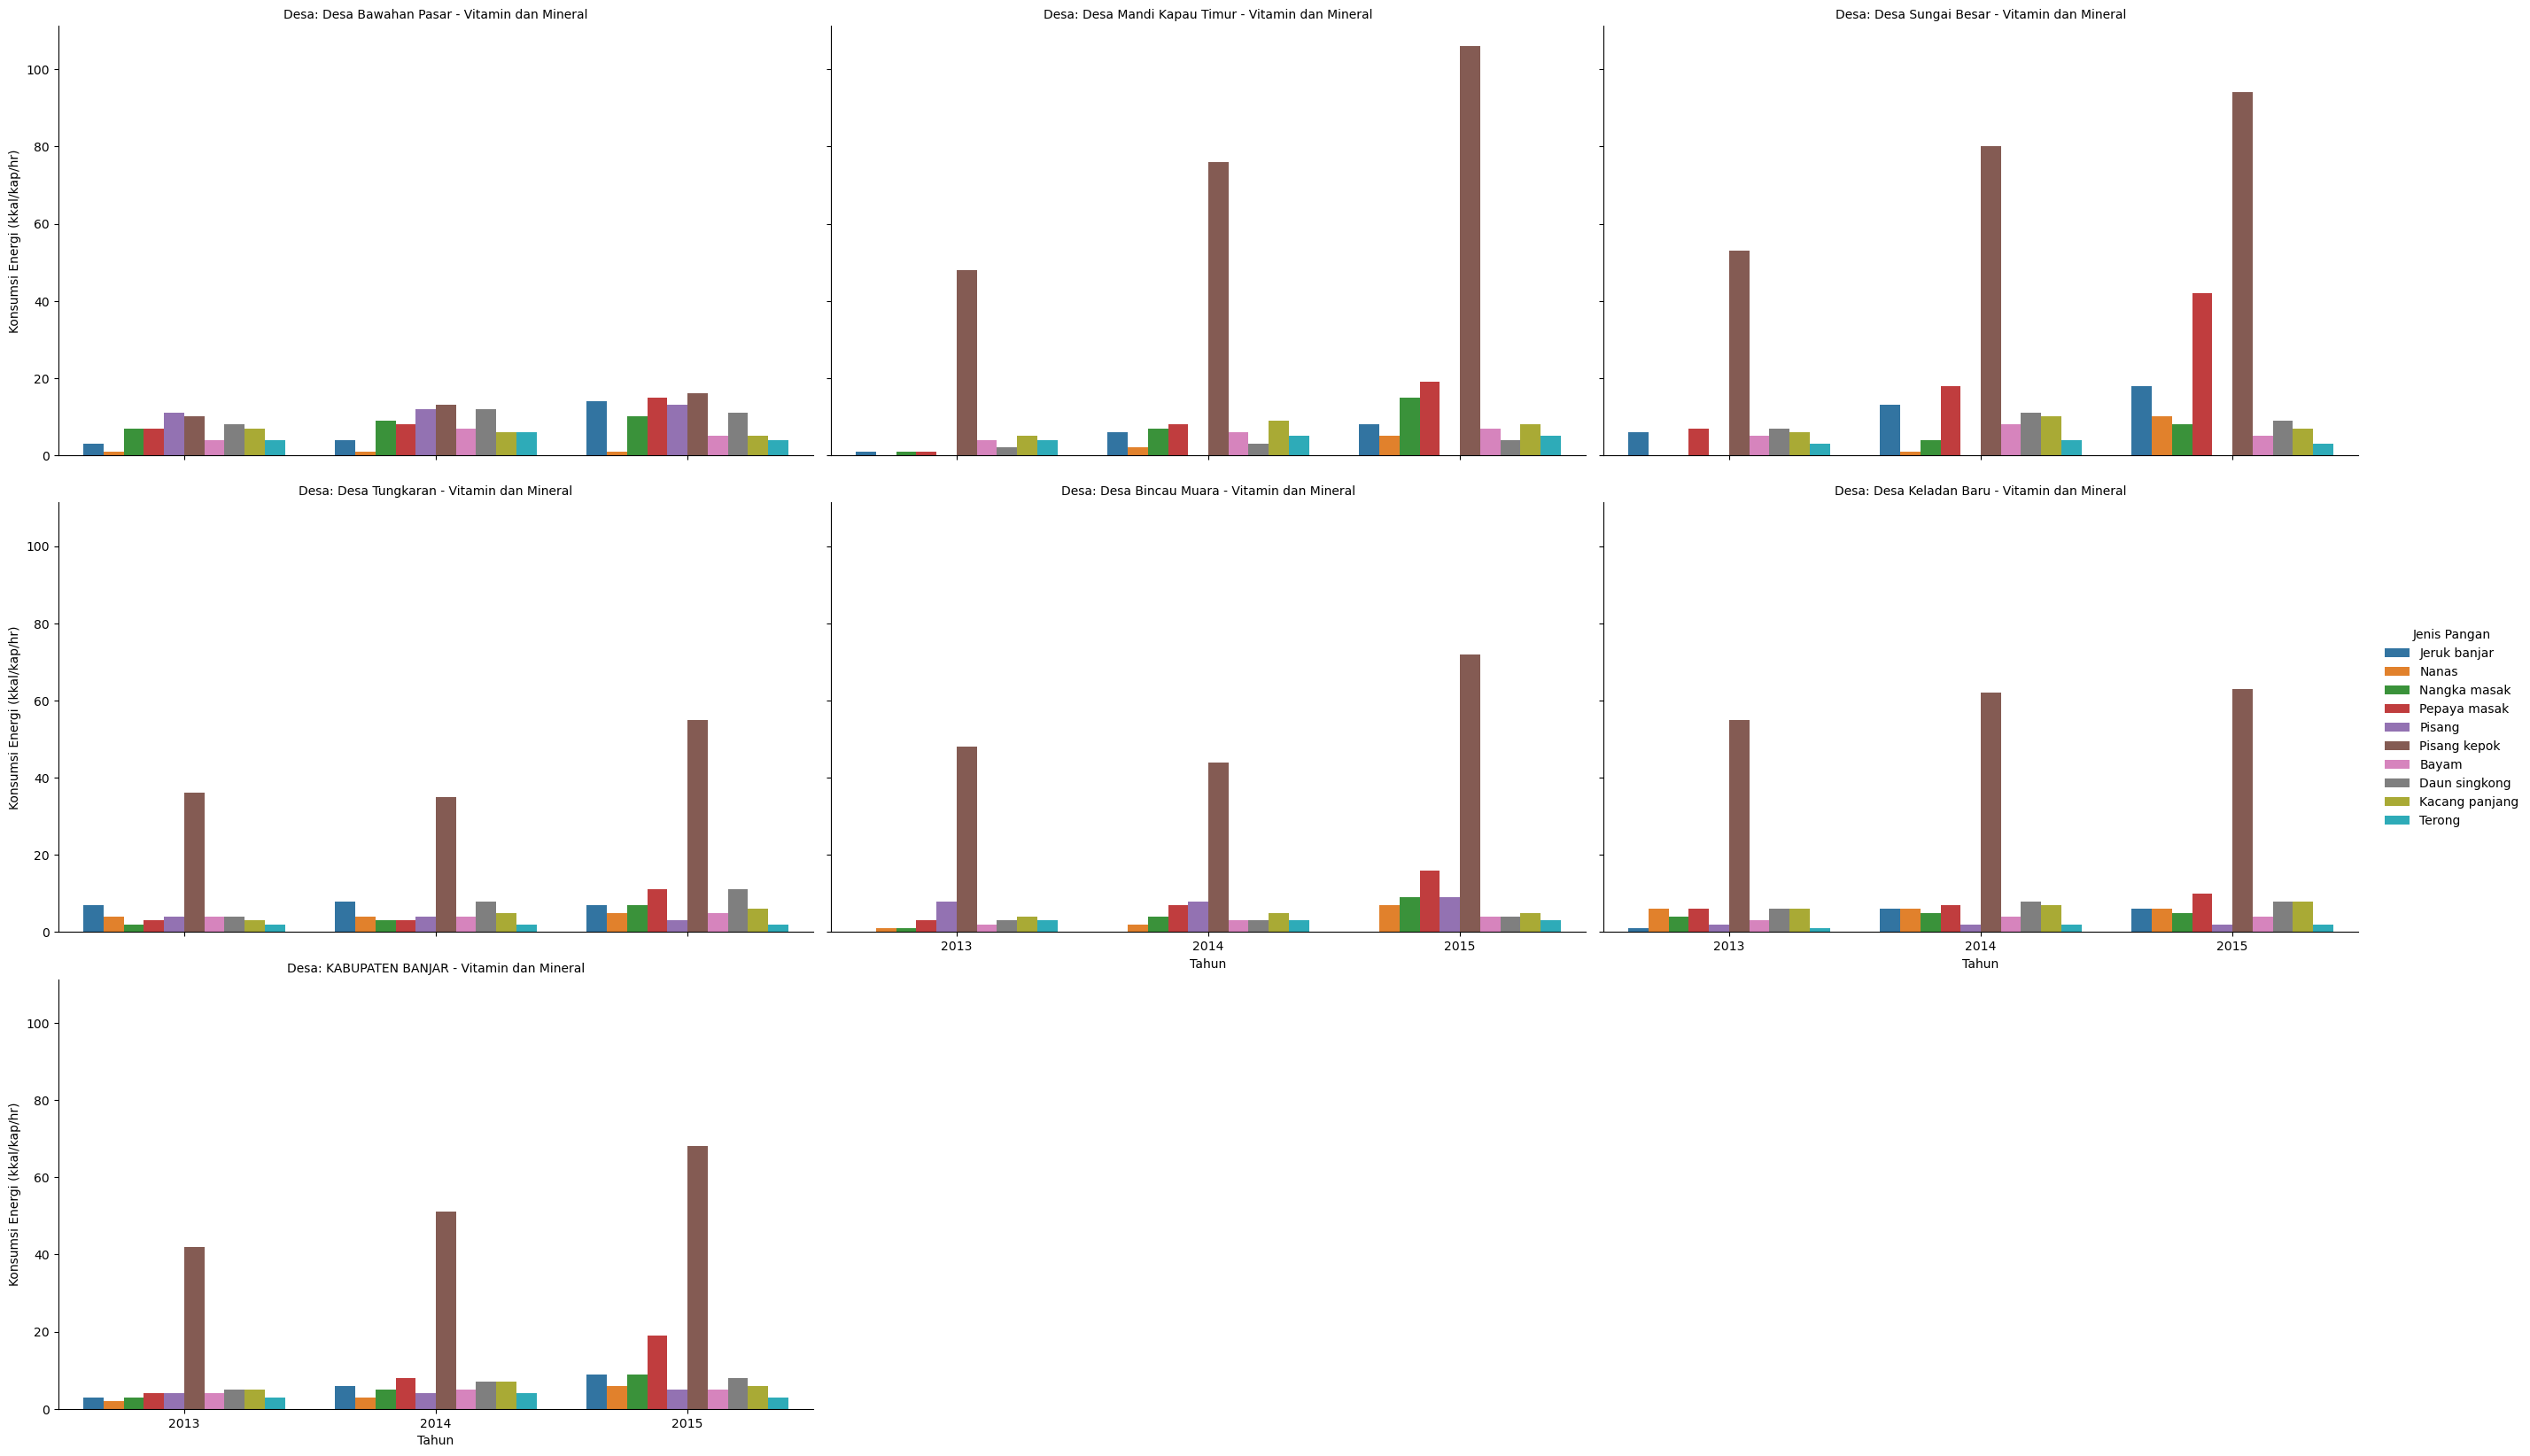

In [23]:
# Menentukan subset data hanya untuk jenis pangan yang menggunakan bar chart
df_vitamin_mineral = df_all[df_all["Sumber"] == "Vitamin dan Mineral"]

# Memilih beberapa jenis pangan utama yang dominan
top_pangan = df_vitamin_mineral.groupby("Jenis Pangan")["Kuantitas Pangan kkal/kap/hr"].sum().nlargest(10).index
df_vitamin_mineral_filtered = df_vitamin_mineral[df_vitamin_mineral["Jenis Pangan"].isin(top_pangan)]

# Membuat visualisasi dengan bar chart yang lebih jelas
g = sns.catplot(
    data=df_vitamin_mineral_filtered,
    x="Tahun",
    y="Kuantitas Pangan kkal/kap/hr",
    hue="Jenis Pangan",
    col="Wilayah",  # Setiap desa memiliki subplot sendiri
    kind="bar",
    col_wrap=3,  # Membatasi jumlah kolom agar subplot lebih besar
    height=6,  # Ukuran lebih besar untuk keterbacaan
    aspect=1.5,  # Rasio lebih lebar
    errorbar=None
)

g.set_axis_labels("Tahun", "Konsumsi Energi (kkal/kap/hr)")
g.set_titles("Desa: {col_name} - Vitamin dan Mineral")
g.legend.set_title("Jenis Pangan")

# Memperbesar legend agar lebih jelas
plt.subplots_adjust(top=0.9)
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------------

## 5. Prediksi Total Tahun 2016

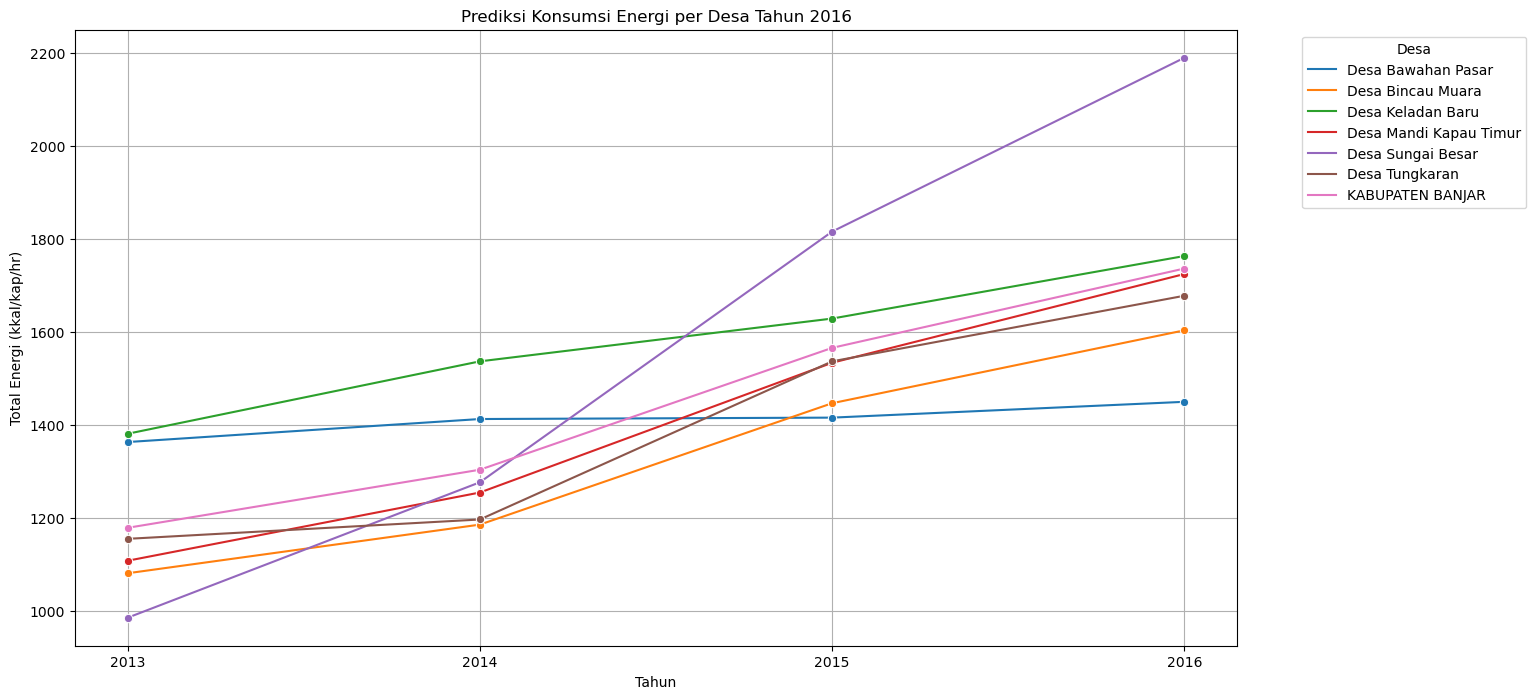

In [29]:
# Membuat DataFrame untuk menyimpan prediksi
df_predictions = df_energy.copy()

# Menyiapkan model regresi
model = LinearRegression()

# Menyimpan hasil prediksi
predictions = []

# Melakukan prediksi untuk setiap desa
for desa in df_energy["Wilayah"].unique():
    df_desa = df_energy[df_energy["Wilayah"] == desa]

    # Variabel independen (Tahun) dan dependen (Energi)
    X = df_desa["Tahun"].values.reshape(-1, 1)
    y = df_desa["Kuantitas Pangan kkal/kap/hr"].values

    # Melatih model regresi
    model.fit(X, y)

    # Memprediksi untuk tahun 2016
    y_pred = model.predict(np.array([[2016]]))[0]
    predictions.append({"Wilayah": desa, "Tahun": 2016, "Kuantitas Pangan kkal/kap/hr": y_pred})

# Menambahkan hasil prediksi ke DataFrame
df_predictions = pd.concat([df_predictions, pd.DataFrame(predictions)], ignore_index=True)

# Menampilkan hasil prediksi
df_predictions.tail()


# Visualisasi prediksi konsumsi energi 2016
plt.figure(figsize=(15, 8))

# Plot data historis dan prediksi
sns.lineplot(data=df_predictions, x="Tahun", y="Kuantitas Pangan kkal/kap/hr", hue="Wilayah", marker="o")

# Menambahkan judul dan label
plt.title("Prediksi Konsumsi Energi per Desa Tahun 2016")
plt.xlabel("Tahun")
plt.ylabel("Total Energi (kkal/kap/hr)")
plt.legend(title="Desa", bbox_to_anchor=(1.05, 1), loc="upper left")

# Menampilkan plot
plt.xticks([2013, 2014, 2015, 2016])
plt.grid(True)
plt.show()


In [30]:
df_predictions

,Wilayah,Tahun,Kuantitas Pangan kkal/kap/hr
0,Desa Bawahan Pasar,2013,1363.500000
1,Desa Bawahan Pasar,2014,1413.000000
2,Desa Bawahan Pasar,2015,1416.000000
3,Desa Bincau Muara,2013,1081.400000
4,Desa Bincau Muara,2014,1186.000000
5,Desa Bincau Muara,2015,1447.000000
6,Desa Keladan Baru,2013,1381.300000
7,Desa Keladan Baru,2014,1537.000000
8,Desa Keladan Baru,2015,1629.000000
9,Desa Mandi Kapau Timur,2013,1108.300000


## 6. Prediksi Konsumsi Energi Berdasarkan Sumber di Setiap Desa Tahun 2016

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


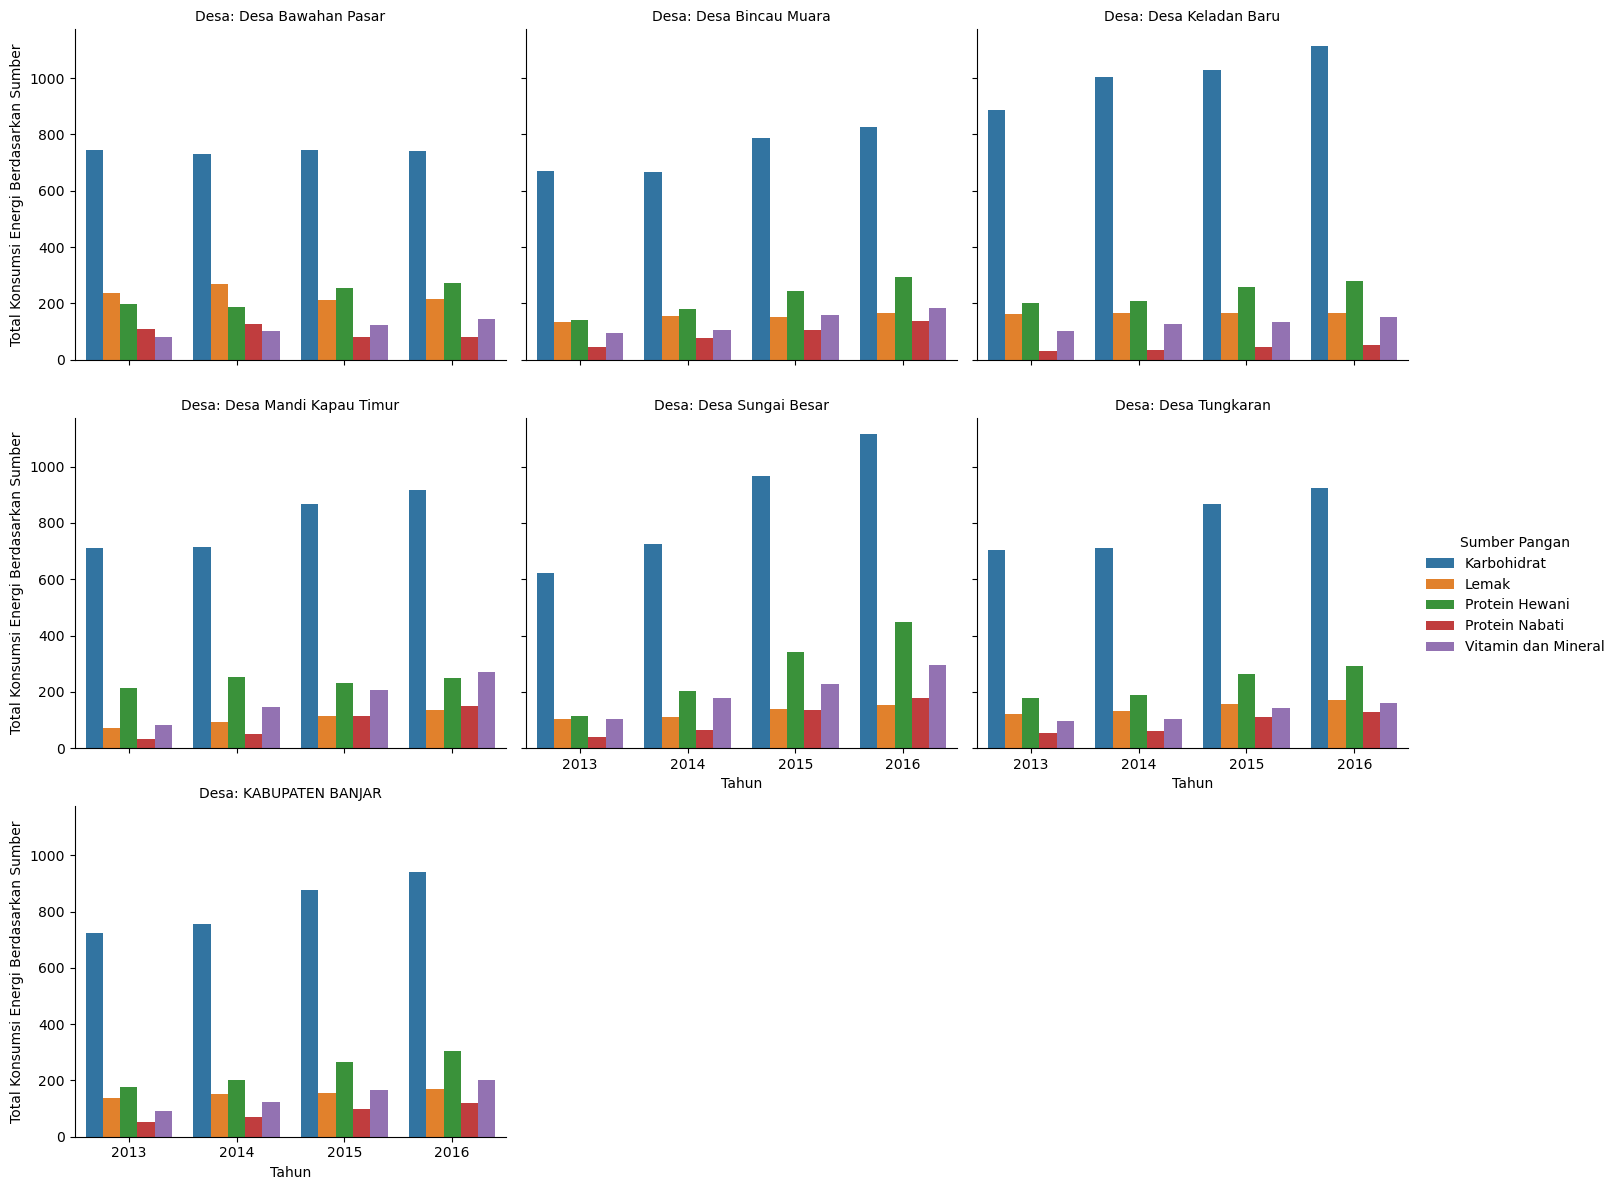

In [31]:
# # Menyiapkan DataFrame untuk prediksi
# df_sumber = df_all.groupby(["Wilayah", "Tahun", "Sumber"])["Kuantitas Pangan kkal/kap/hr"].sum().reset_index()

# Model regresi linear
model = LinearRegression()
predictions = []

# Melakukan prediksi untuk setiap desa dan sumber pangan
for (desa, sumber), df_group in df_with_sumber.groupby(["Wilayah", "Sumber"]):
    X = df_group["Tahun"].values.reshape(-1, 1)
    y = df_group["Kuantitas Pangan kkal/kap/hr"].values

    if len(X) >= 2:  # Pastikan ada cukup data untuk regresi
        model.fit(X, y)
        y_pred = model.predict(np.array([[2016]]))[0]

        predictions.append({"Wilayah": desa, "Tahun": 2016, "Sumber": sumber, "Kuantitas Pangan kkal/kap/hr": y_pred})

# Menambahkan prediksi ke DataFrame
df_sumber = pd.concat([df_with_sumber, pd.DataFrame(predictions)], ignore_index=True)

# Membuat facet grid untuk visualisasi dengan prediksi 2016
g = sns.catplot(
    data=df_sumber,
    x="Tahun",
    y="Kuantitas Pangan kkal/kap/hr",
    hue="Sumber",
    col="Wilayah",  # Setiap desa memiliki subplot sendiri
    kind="bar",
    col_wrap=3,  # Menyesuaikan jumlah kolom agar tidak terlalu panjang
    height=4,
    aspect=1.2
)

g.set_axis_labels("Tahun", "Total Konsumsi Energi Berdasarkan Sumber")
g.set_titles("Desa: {col_name}")
g.legend.set_title("Sumber Pangan")

# Menampilkan plot
plt.show()


### Tabel

#### 2016

In [32]:
df_pred_2016 = pd.DataFrame(predictions)

# Menampilkan tabel prediksi konsumsi energi berdasarkan sumber pangan untuk tahun 2016
df_pred_2016

,Wilayah,Tahun,Sumber,Kuantitas Pangan kkal/kap/hr
0,Desa Bawahan Pasar,2016,Karbohidrat,739.333333
1,Desa Bawahan Pasar,2016,Lemak,215.000000
2,Desa Bawahan Pasar,2016,Protein Hewani,270.666667
3,Desa Bawahan Pasar,2016,Protein Nabati,80.000000
4,Desa Bawahan Pasar,2016,Vitamin dan Mineral,145.000000
5,Desa Bincau Muara,2016,Karbohidrat,825.066667
6,Desa Bincau Muara,2016,Lemak,166.666667
7,Desa Bincau Muara,2016,Protein Hewani,292.000000
8,Desa Bincau Muara,2016,Protein Nabati,136.666667
9,Desa Bincau Muara,2016,Vitamin dan Mineral,183.333333


## 7. Prediksi Konsumsi Energi Berdasarkan Jenis Pangan di Setiap Desa Tahun 2016

### Karbohidrat, Protein Hewani, Protein Nabati, dan Lemak

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


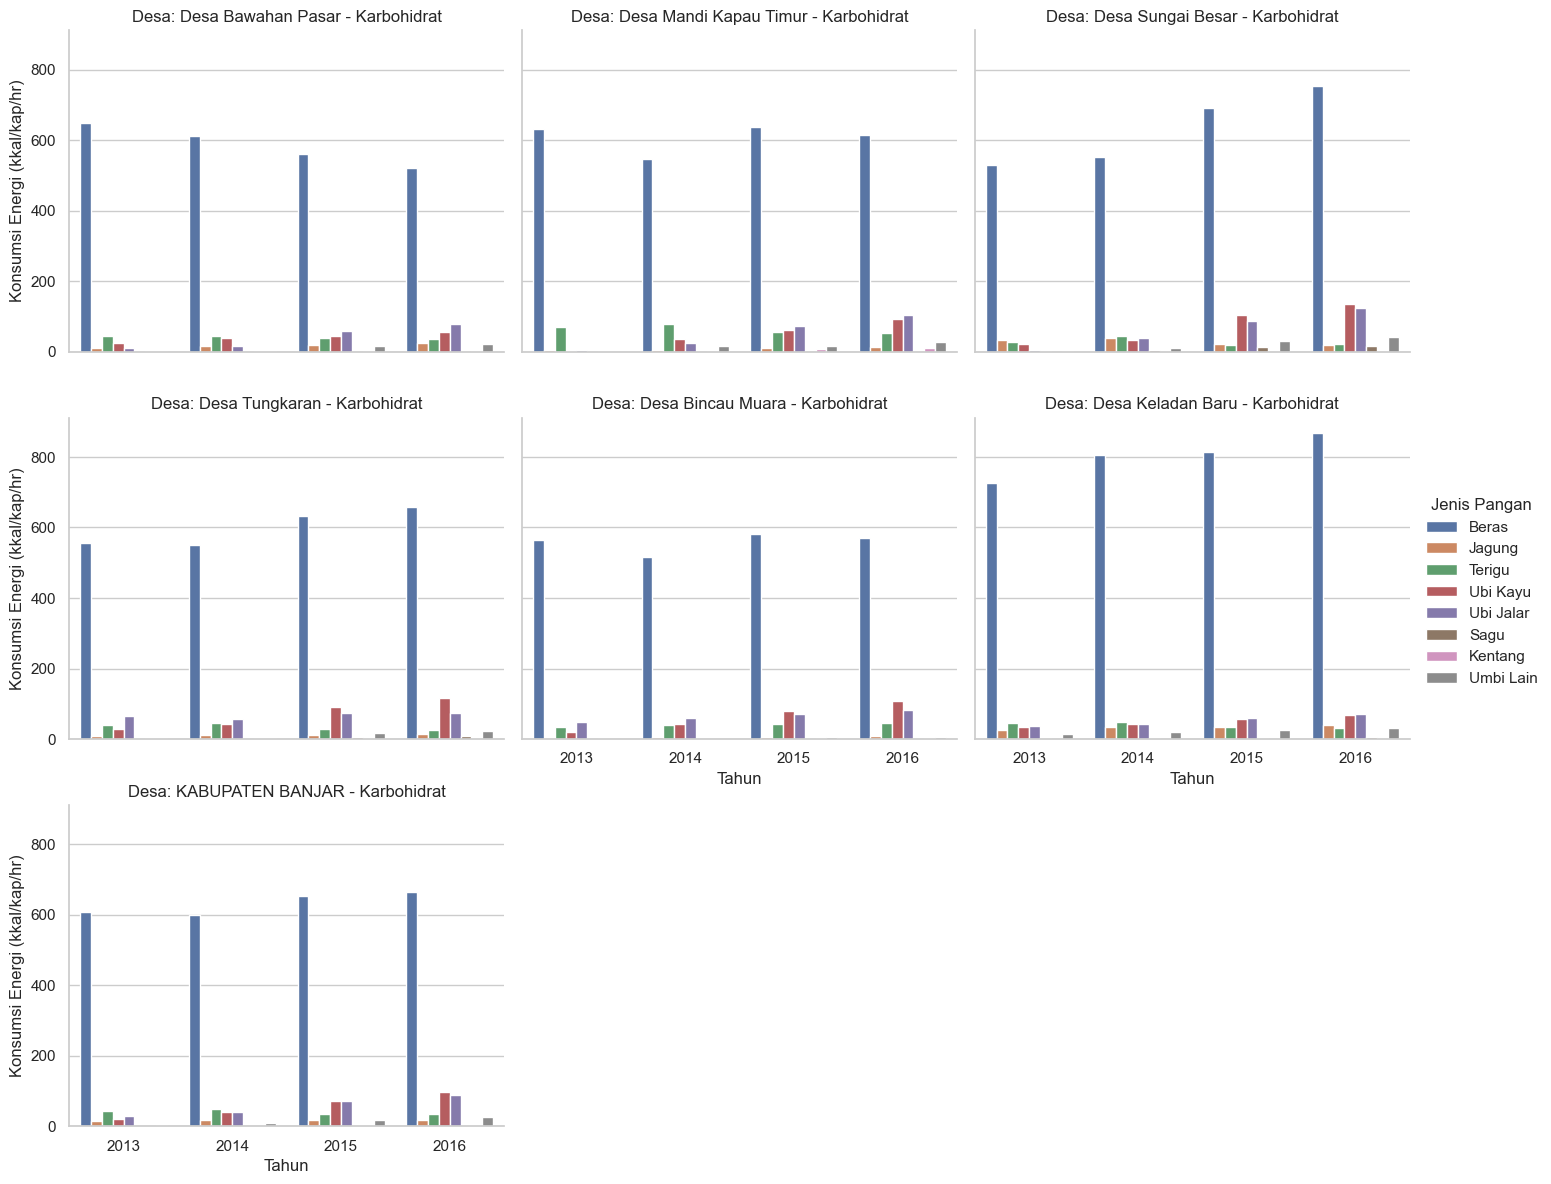

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


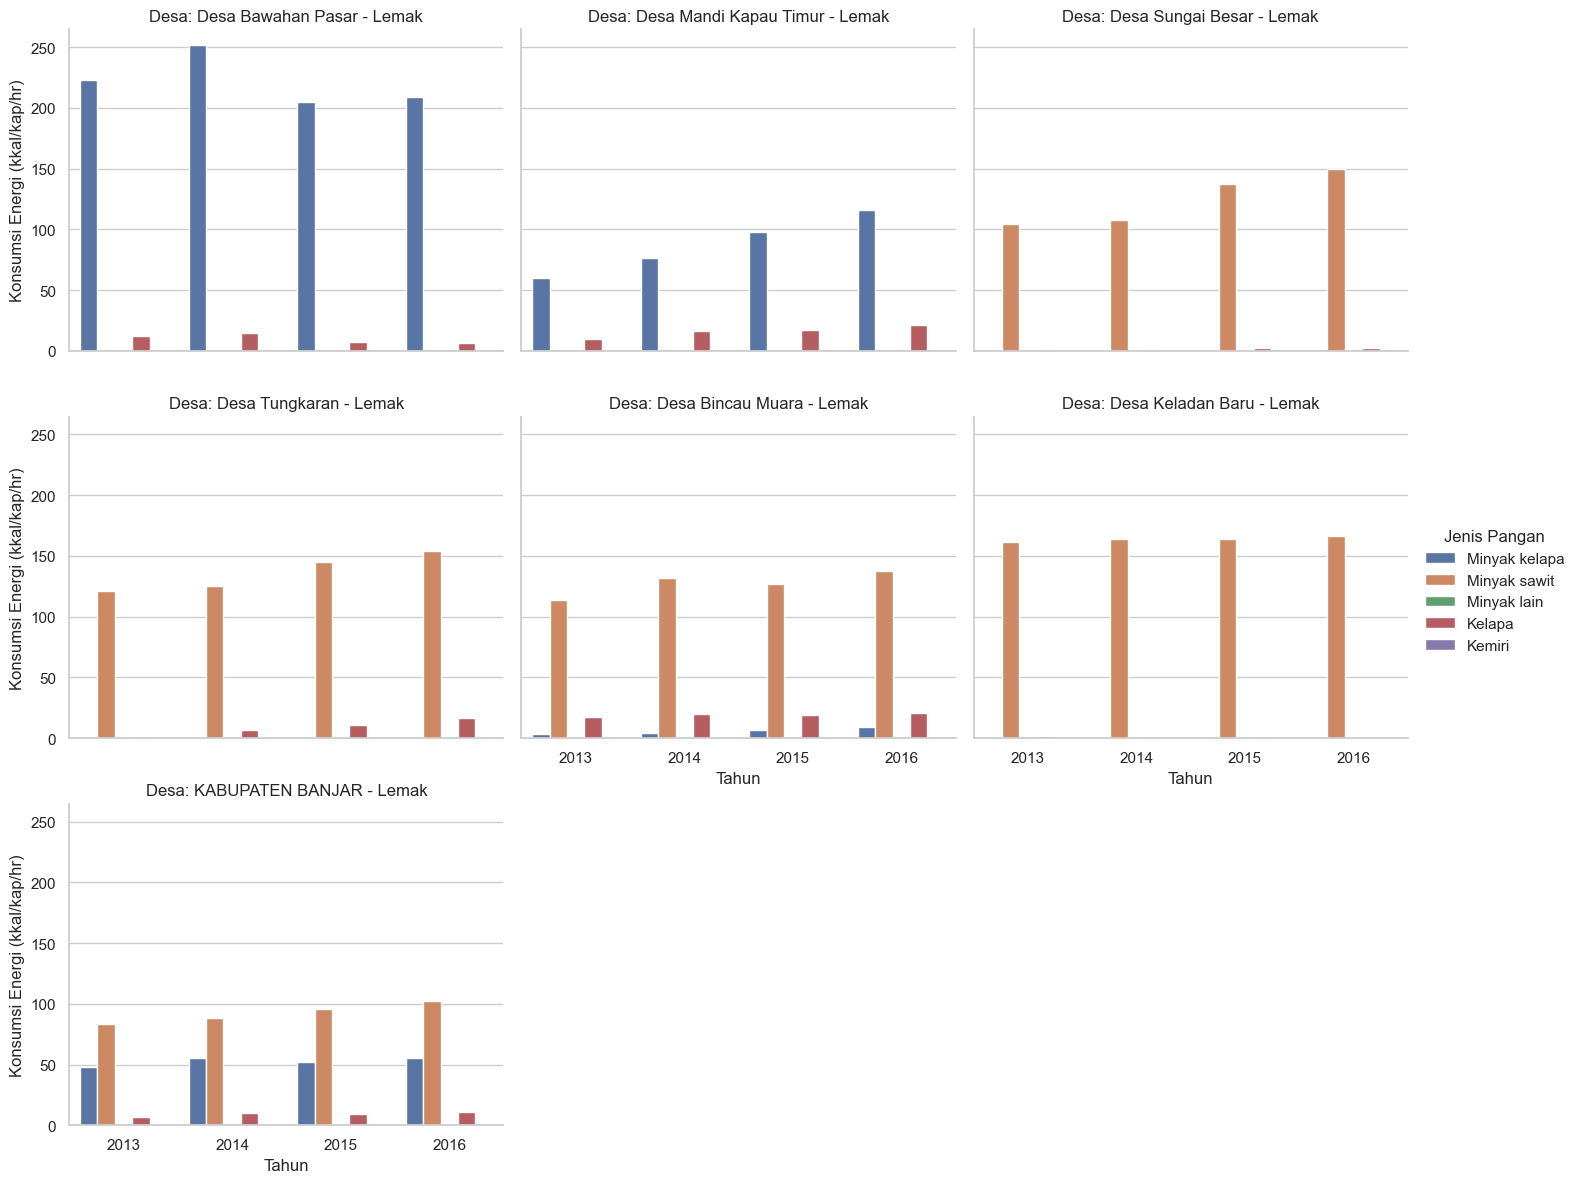

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


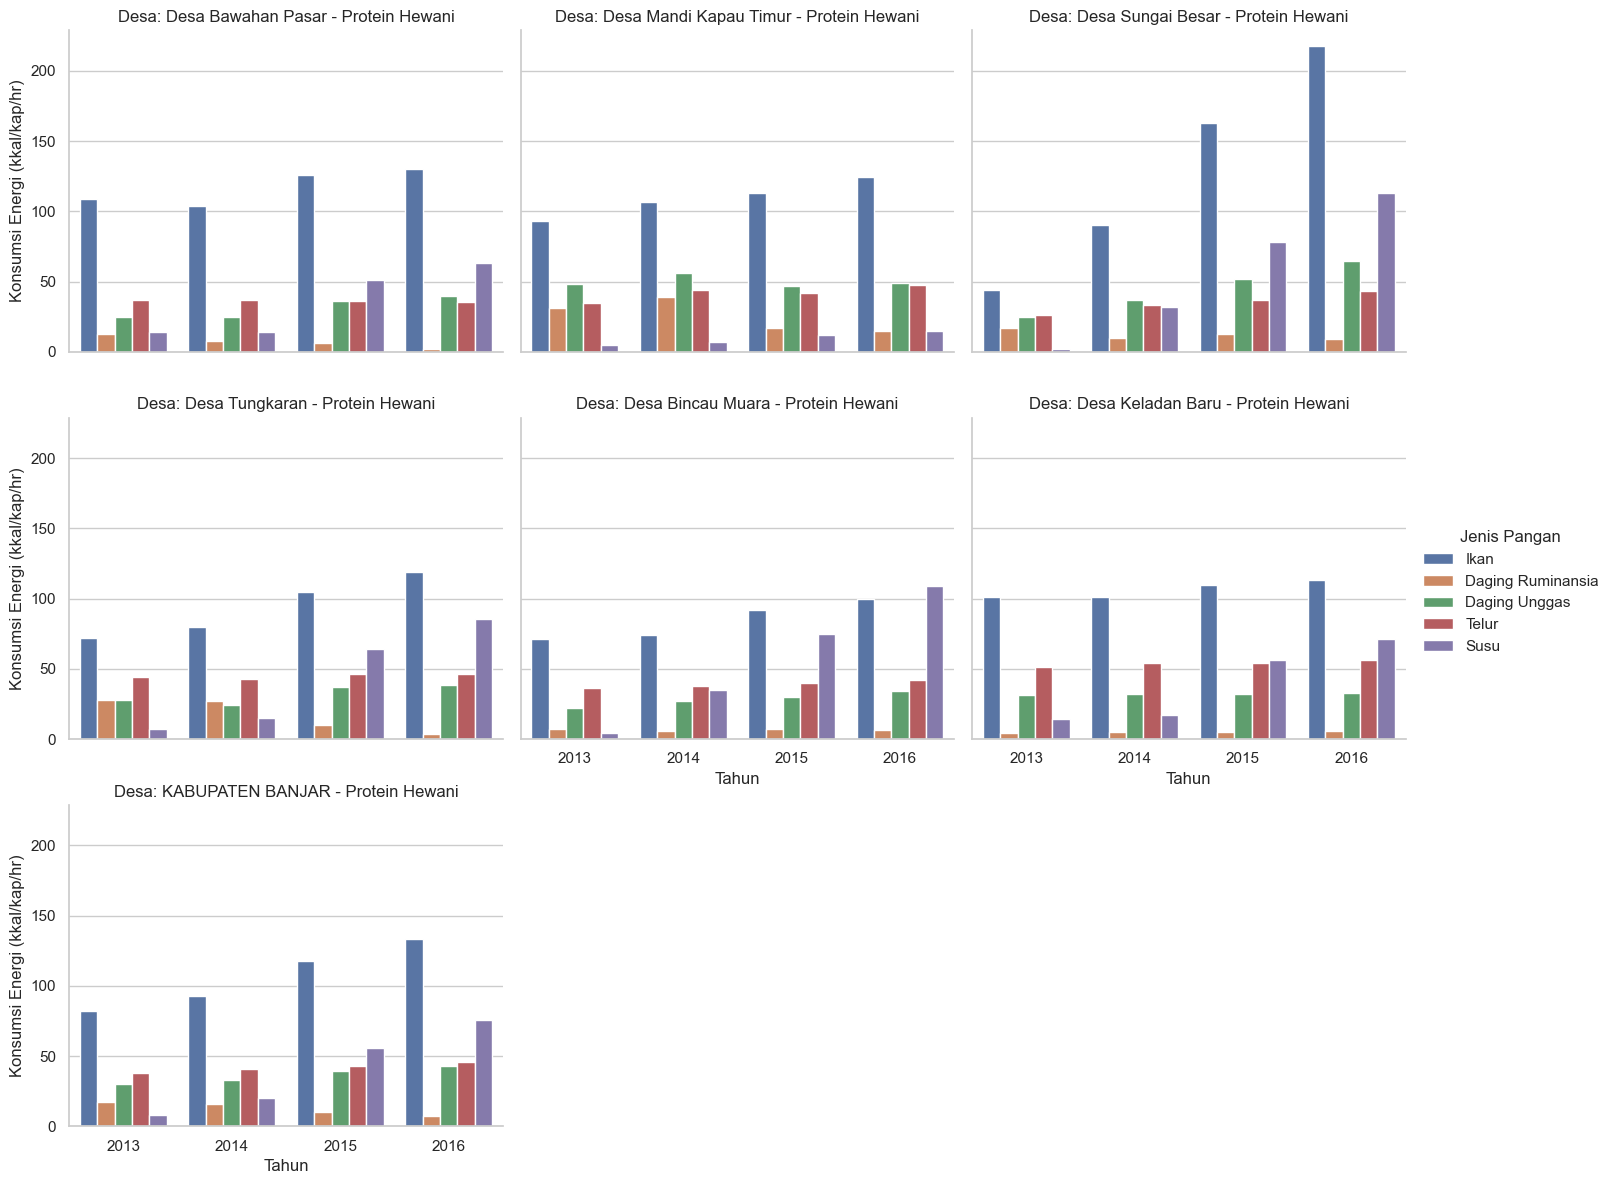

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


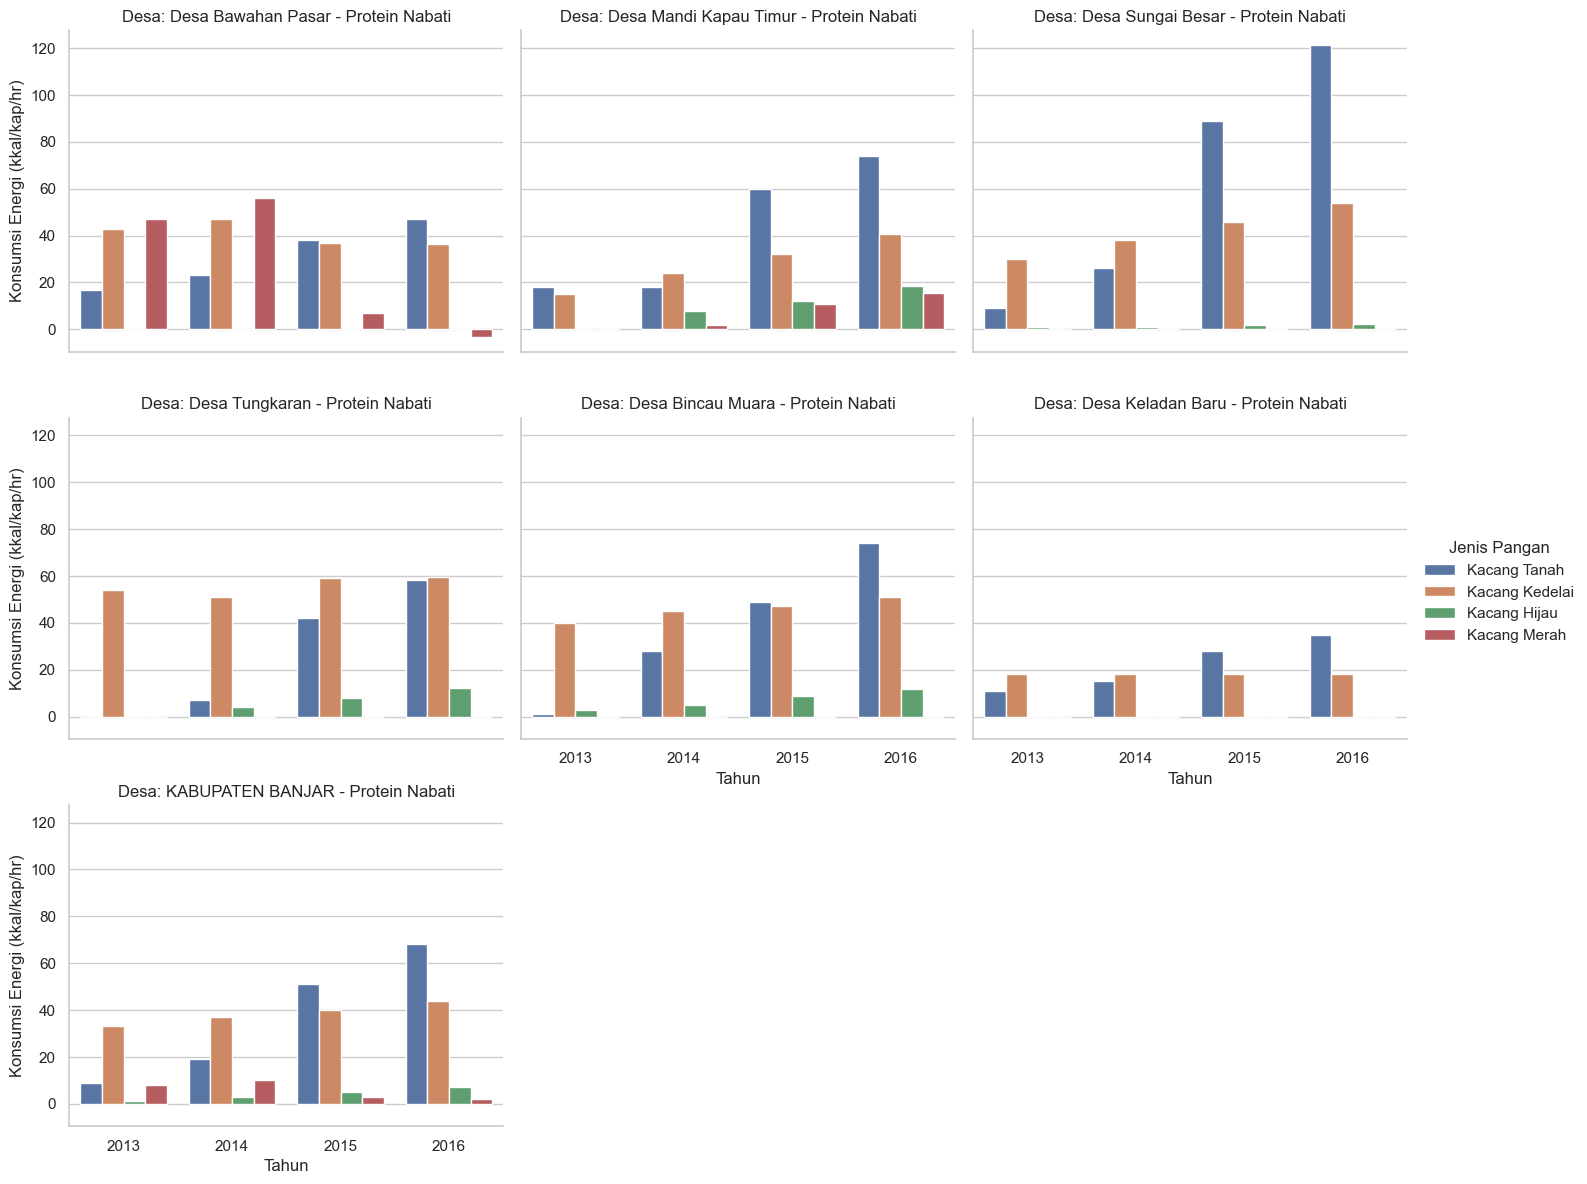

In [33]:
# Mengonversi kolom "Kuantitas Pangan kkal/kap/hr" menjadi numerik
df_all["Kuantitas Pangan kkal/kap/hr"] = pd.to_numeric(df_all["Kuantitas Pangan kkal/kap/hr"], errors="coerce")

# Menyaring hanya data yang relevan (tidak termasuk Vitamin dan Mineral)
df_filtered = df_all[df_all["Sumber"] != "Vitamin dan Mineral"].copy()

# Prediksi untuk tahun 2016 menggunakan regresi linier
predictions = []
for (wilayah, jenis_pangan, sumber), group in df_filtered.groupby(["Wilayah", "Jenis Pangan", "Sumber"]):
    X = group["Tahun"].values.reshape(-1, 1)  # Tahun sebagai variabel independen
    y = group["Kuantitas Pangan kkal/kap/hr"].values  # Konsumsi energi sebagai variabel dependen

    if len(X) > 1:  # Pastikan ada cukup data untuk membuat model
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(np.array([[2016]]))  # Prediksi untuk tahun 2016
        predictions.append([wilayah, jenis_pangan, sumber, 2016, y_pred[0]])

# Membuat DataFrame dari hasil prediksi
df_predictions = pd.DataFrame(predictions, columns=["Wilayah", "Jenis Pangan", "Sumber", "Tahun", "Kuantitas Pangan kkal/kap/hr"])

# Menggabungkan data asli dengan prediksi
df_combined = pd.concat([df_filtered, df_predictions], ignore_index=True)

# Visualisasi data per "Sumber"
sns.set(style="whitegrid")

for sumber, df_sumber in df_combined.groupby("Sumber"):
    g = sns.catplot(
        data=df_sumber,
        x="Tahun",
        y="Kuantitas Pangan kkal/kap/hr",
        hue="Jenis Pangan",
        col="Wilayah",
        kind="bar",
        col_wrap=3,
        height=4,
        aspect=1.2,
        errorbar=None
    )

    g.set_axis_labels("Tahun", "Konsumsi Energi (kkal/kap/hr)")
    g.set_titles(f"Desa: {{col_name}} - {sumber}")
    g.legend.set_title("Jenis Pangan")

    plt.show()

#### Tabel Berdasarkan Sumber

In [34]:
# Menampilkan tabel untuk masing-masing Sumber secara terpisah dalam format DataFrame
for sumber, df_sumber in df_combined.groupby("Sumber"):
    print(f"\n=== Sumber: {sumber} ===")
    
    # Menampilkan tabel dalam format DataFrame
    display(df_sumber[["Wilayah", "Jenis Pangan", "Kuantitas Pangan kkal/kap/hr", "Tahun"]].reset_index(drop=True))


=== Sumber: Karbohidrat ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Beras,648.600000,2013
1,Desa Bawahan Pasar,Jagung,11.900000,2013
2,Desa Bawahan Pasar,Terigu,44.300000,2013
3,Desa Bawahan Pasar,Ubi Kayu,25.200000,2013
4,Desa Bawahan Pasar,Ubi Jalar,10.300000,2013
...,...,...,...,...
219,KABUPATEN BANJAR,Sagu,4.933333,2016
220,KABUPATEN BANJAR,Terigu,35.400000,2016
221,KABUPATEN BANJAR,Ubi Jalar,89.133333,2016
222,KABUPATEN BANJAR,Ubi Kayu,96.400000,2016



=== Sumber: Lemak ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak kelapa,223.000000,2013
1,Desa Bawahan Pasar,Minyak sawit,0.000000,2013
2,Desa Bawahan Pasar,Minyak lain,0.000000,2013
3,Desa Bawahan Pasar,Kelapa,12.000000,2013
4,Desa Bawahan Pasar,Kemiri,0.000000,2013
...,...,...,...,...
135,KABUPATEN BANJAR,Kelapa,10.666667,2016
136,KABUPATEN BANJAR,Kemiri,0.000000,2016
137,KABUPATEN BANJAR,Minyak kelapa,55.666667,2016
138,KABUPATEN BANJAR,Minyak lain,0.000000,2016



=== Sumber: Protein Hewani ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ikan,109.000000,2013
1,Desa Bawahan Pasar,Daging Ruminansia,13.000000,2013
2,Desa Bawahan Pasar,Daging Unggas,25.000000,2013
3,Desa Bawahan Pasar,Telur,37.000000,2013
4,Desa Bawahan Pasar,Susu,14.000000,2013
...,...,...,...,...
135,KABUPATEN BANJAR,Daging Ruminansia,7.333333,2016
136,KABUPATEN BANJAR,Daging Unggas,43.000000,2016
137,KABUPATEN BANJAR,Ikan,133.666667,2016
138,KABUPATEN BANJAR,Susu,76.000000,2016



=== Sumber: Protein Nabati ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Tanah,17.000000,2013
1,Desa Bawahan Pasar,Kacang Kedelai,43.000000,2013
2,Desa Bawahan Pasar,Kacang Hijau,0.000000,2013
3,Desa Bawahan Pasar,Kacang Merah,47.000000,2013
4,Desa Mandi Kapau Timur,Kacang Tanah,18.000000,2013
...,...,...,...,...
107,Desa Tungkaran,Kacang Tanah,58.333333,2016
108,KABUPATEN BANJAR,Kacang Hijau,7.000000,2016
109,KABUPATEN BANJAR,Kacang Kedelai,43.666667,2016
110,KABUPATEN BANJAR,Kacang Merah,2.000000,2016


#### Tabel Berdasarkan Jenis Pangan

##### Semua Tahun

In [35]:
# Menyaring data tanpa "Vitamin dan Mineral" dan hanya mengambil kolom yang dibutuhkan
# df_filtered_no_vitamin = df_combined[df_combined["Sumber"] != "Vitamin dan Mineral"]

# Menampilkan tabel untuk masing-masing Jenis Pangan secara terpisah
for jenis_pangan, df_pangan in df_combined.groupby("Jenis Pangan"):
    print(f"\n=== Jenis Pangan: {jenis_pangan} ===")
    display(df_pangan[["Wilayah", "Jenis Pangan", "Kuantitas Pangan kkal/kap/hr", "Tahun"]].reset_index(drop=True))


=== Jenis Pangan: Beras ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Beras,648.600000,2013
1,Desa Mandi Kapau Timur,Beras,630.900000,2013
2,Desa Sungai Besar,Beras,529.500000,2013
3,Desa Tungkaran,Beras,554.600000,2013
4,Desa Bincau Muara,Beras,563.900000,2013
5,Desa Keladan Baru,Beras,726.900000,2013
6,KABUPATEN BANJAR,Beras,609.100000,2013
7,Desa Bawahan Pasar,Beras,613.000000,2014
8,Desa Mandi Kapau Timur,Beras,548.000000,2014
9,Desa Sungai Besar,Beras,552.000000,2014



=== Jenis Pangan: Daging Ruminansia ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Daging Ruminansia,13.000000,2013
1,Desa Mandi Kapau Timur,Daging Ruminansia,31.000000,2013
2,Desa Sungai Besar,Daging Ruminansia,17.000000,2013
3,Desa Tungkaran,Daging Ruminansia,28.000000,2013
4,Desa Bincau Muara,Daging Ruminansia,7.000000,2013
5,Desa Keladan Baru,Daging Ruminansia,4.000000,2013
6,KABUPATEN BANJAR,Daging Ruminansia,17.000000,2013
7,Desa Bawahan Pasar,Daging Ruminansia,8.000000,2014
8,Desa Mandi Kapau Timur,Daging Ruminansia,39.000000,2014
9,Desa Sungai Besar,Daging Ruminansia,10.000000,2014



=== Jenis Pangan: Daging Unggas ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Daging Unggas,25.000000,2013
1,Desa Mandi Kapau Timur,Daging Unggas,48.000000,2013
2,Desa Sungai Besar,Daging Unggas,25.000000,2013
3,Desa Tungkaran,Daging Unggas,28.000000,2013
4,Desa Bincau Muara,Daging Unggas,22.000000,2013
5,Desa Keladan Baru,Daging Unggas,31.000000,2013
6,KABUPATEN BANJAR,Daging Unggas,30.000000,2013
7,Desa Bawahan Pasar,Daging Unggas,25.000000,2014
8,Desa Mandi Kapau Timur,Daging Unggas,56.000000,2014
9,Desa Sungai Besar,Daging Unggas,37.000000,2014



=== Jenis Pangan: Ikan ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ikan,109.000000,2013
1,Desa Mandi Kapau Timur,Ikan,93.000000,2013
2,Desa Sungai Besar,Ikan,44.000000,2013
3,Desa Tungkaran,Ikan,72.000000,2013
4,Desa Bincau Muara,Ikan,71.000000,2013
5,Desa Keladan Baru,Ikan,101.000000,2013
6,KABUPATEN BANJAR,Ikan,82.000000,2013
7,Desa Bawahan Pasar,Ikan,104.000000,2014
8,Desa Mandi Kapau Timur,Ikan,107.000000,2014
9,Desa Sungai Besar,Ikan,90.000000,2014



=== Jenis Pangan: Jagung ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Jagung,11.900000,2013
1,Desa Mandi Kapau Timur,Jagung,5.100000,2013
2,Desa Sungai Besar,Jagung,32.800000,2013
3,Desa Tungkaran,Jagung,9.000000,2013
4,Desa Bincau Muara,Jagung,1.300000,2013
5,Desa Keladan Baru,Jagung,26.700000,2013
6,KABUPATEN BANJAR,Jagung,14.500000,2013
7,Desa Bawahan Pasar,Jagung,16.000000,2014
8,Desa Mandi Kapau Timur,Jagung,6.000000,2014
9,Desa Sungai Besar,Jagung,38.000000,2014



=== Jenis Pangan: Kacang Hijau ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Hijau,0.000000,2013
1,Desa Mandi Kapau Timur,Kacang Hijau,0.000000,2013
2,Desa Sungai Besar,Kacang Hijau,1.000000,2013
3,Desa Tungkaran,Kacang Hijau,0.000000,2013
4,Desa Bincau Muara,Kacang Hijau,3.000000,2013
5,Desa Keladan Baru,Kacang Hijau,0.000000,2013
6,KABUPATEN BANJAR,Kacang Hijau,1.000000,2013
7,Desa Bawahan Pasar,Kacang Hijau,0.000000,2014
8,Desa Mandi Kapau Timur,Kacang Hijau,8.000000,2014
9,Desa Sungai Besar,Kacang Hijau,1.000000,2014



=== Jenis Pangan: Kacang Kedelai ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Kedelai,43.000000,2013
1,Desa Mandi Kapau Timur,Kacang Kedelai,15.000000,2013
2,Desa Sungai Besar,Kacang Kedelai,30.000000,2013
3,Desa Tungkaran,Kacang Kedelai,54.000000,2013
4,Desa Bincau Muara,Kacang Kedelai,40.000000,2013
5,Desa Keladan Baru,Kacang Kedelai,18.000000,2013
6,KABUPATEN BANJAR,Kacang Kedelai,33.000000,2013
7,Desa Bawahan Pasar,Kacang Kedelai,47.000000,2014
8,Desa Mandi Kapau Timur,Kacang Kedelai,24.000000,2014
9,Desa Sungai Besar,Kacang Kedelai,38.000000,2014



=== Jenis Pangan: Kacang Merah ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Merah,47.000000,2013
1,Desa Mandi Kapau Timur,Kacang Merah,0.000000,2013
2,Desa Sungai Besar,Kacang Merah,0.000000,2013
3,Desa Tungkaran,Kacang Merah,0.000000,2013
4,Desa Bincau Muara,Kacang Merah,0.000000,2013
5,Desa Keladan Baru,Kacang Merah,0.000000,2013
6,KABUPATEN BANJAR,Kacang Merah,8.000000,2013
7,Desa Bawahan Pasar,Kacang Merah,56.000000,2014
8,Desa Mandi Kapau Timur,Kacang Merah,2.000000,2014
9,Desa Sungai Besar,Kacang Merah,0.000000,2014



=== Jenis Pangan: Kacang Tanah ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Tanah,17.000000,2013
1,Desa Mandi Kapau Timur,Kacang Tanah,18.000000,2013
2,Desa Sungai Besar,Kacang Tanah,9.000000,2013
3,Desa Tungkaran,Kacang Tanah,0.000000,2013
4,Desa Bincau Muara,Kacang Tanah,1.000000,2013
5,Desa Keladan Baru,Kacang Tanah,11.000000,2013
6,KABUPATEN BANJAR,Kacang Tanah,9.000000,2013
7,Desa Bawahan Pasar,Kacang Tanah,23.000000,2014
8,Desa Mandi Kapau Timur,Kacang Tanah,18.000000,2014
9,Desa Sungai Besar,Kacang Tanah,26.000000,2014



=== Jenis Pangan: Kelapa ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kelapa,12.000000,2013
1,Desa Mandi Kapau Timur,Kelapa,10.000000,2013
2,Desa Sungai Besar,Kelapa,1.000000,2013
3,Desa Tungkaran,Kelapa,1.000000,2013
4,Desa Bincau Muara,Kelapa,17.000000,2013
5,Desa Keladan Baru,Kelapa,2.000000,2013
6,KABUPATEN BANJAR,Kelapa,7.000000,2013
7,Desa Bawahan Pasar,Kelapa,15.000000,2014
8,Desa Mandi Kapau Timur,Kelapa,16.000000,2014
9,Desa Sungai Besar,Kelapa,1.000000,2014



=== Jenis Pangan: Kemiri ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kemiri,0.0,2013
1,Desa Mandi Kapau Timur,Kemiri,0.0,2013
2,Desa Sungai Besar,Kemiri,0.0,2013
3,Desa Tungkaran,Kemiri,0.0,2013
4,Desa Bincau Muara,Kemiri,0.0,2013
5,Desa Keladan Baru,Kemiri,0.0,2013
6,KABUPATEN BANJAR,Kemiri,0.0,2013
7,Desa Bawahan Pasar,Kemiri,0.0,2014
8,Desa Mandi Kapau Timur,Kemiri,0.0,2014
9,Desa Sungai Besar,Kemiri,0.0,2014



=== Jenis Pangan: Kentang ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kentang,1.200000,2013
1,Desa Mandi Kapau Timur,Kentang,1.200000,2013
2,Desa Sungai Besar,Kentang,0.300000,2013
3,Desa Tungkaran,Kentang,2.900000,2013
4,Desa Bincau Muara,Kentang,2.000000,2013
5,Desa Keladan Baru,Kentang,0.500000,2013
6,KABUPATEN BANJAR,Kentang,1.300000,2013
7,Desa Bawahan Pasar,Kentang,1.000000,2014
8,Desa Mandi Kapau Timur,Kentang,1.000000,2014
9,Desa Sungai Besar,Kentang,1.000000,2014



=== Jenis Pangan: Minyak kelapa ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak kelapa,223.000000,2013
1,Desa Mandi Kapau Timur,Minyak kelapa,60.000000,2013
2,Desa Sungai Besar,Minyak kelapa,0.000000,2013
3,Desa Tungkaran,Minyak kelapa,0.000000,2013
4,Desa Bincau Muara,Minyak kelapa,3.000000,2013
5,Desa Keladan Baru,Minyak kelapa,0.000000,2013
6,KABUPATEN BANJAR,Minyak kelapa,48.000000,2013
7,Desa Bawahan Pasar,Minyak kelapa,252.000000,2014
8,Desa Mandi Kapau Timur,Minyak kelapa,76.000000,2014
9,Desa Sungai Besar,Minyak kelapa,0.000000,2014



=== Jenis Pangan: Minyak lain ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak lain,0.0,2013
1,Desa Mandi Kapau Timur,Minyak lain,0.0,2013
2,Desa Sungai Besar,Minyak lain,0.0,2013
3,Desa Tungkaran,Minyak lain,0.0,2013
4,Desa Bincau Muara,Minyak lain,0.0,2013
5,Desa Keladan Baru,Minyak lain,0.0,2013
6,KABUPATEN BANJAR,Minyak lain,0.0,2013
7,Desa Bawahan Pasar,Minyak lain,0.0,2014
8,Desa Mandi Kapau Timur,Minyak lain,0.0,2014
9,Desa Sungai Besar,Minyak lain,0.0,2014



=== Jenis Pangan: Minyak sawit ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak sawit,0.000000,2013
1,Desa Mandi Kapau Timur,Minyak sawit,0.000000,2013
2,Desa Sungai Besar,Minyak sawit,104.000000,2013
3,Desa Tungkaran,Minyak sawit,121.000000,2013
4,Desa Bincau Muara,Minyak sawit,114.000000,2013
5,Desa Keladan Baru,Minyak sawit,161.000000,2013
6,KABUPATEN BANJAR,Minyak sawit,83.000000,2013
7,Desa Bawahan Pasar,Minyak sawit,0.000000,2014
8,Desa Mandi Kapau Timur,Minyak sawit,0.000000,2014
9,Desa Sungai Besar,Minyak sawit,108.000000,2014



=== Jenis Pangan: Sagu ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Sagu,0.000000,2013
1,Desa Mandi Kapau Timur,Sagu,0.000000,2013
2,Desa Sungai Besar,Sagu,3.500000,2013
3,Desa Tungkaran,Sagu,0.000000,2013
4,Desa Bincau Muara,Sagu,0.000000,2013
5,Desa Keladan Baru,Sagu,3.400000,2013
6,KABUPATEN BANJAR,Sagu,1.100000,2013
7,Desa Bawahan Pasar,Sagu,0.000000,2014
8,Desa Mandi Kapau Timur,Sagu,0.000000,2014
9,Desa Sungai Besar,Sagu,4.000000,2014



=== Jenis Pangan: Susu ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Susu,14.000000,2013
1,Desa Mandi Kapau Timur,Susu,5.000000,2013
2,Desa Sungai Besar,Susu,2.000000,2013
3,Desa Tungkaran,Susu,7.000000,2013
4,Desa Bincau Muara,Susu,4.000000,2013
5,Desa Keladan Baru,Susu,14.000000,2013
6,KABUPATEN BANJAR,Susu,8.000000,2013
7,Desa Bawahan Pasar,Susu,14.000000,2014
8,Desa Mandi Kapau Timur,Susu,7.000000,2014
9,Desa Sungai Besar,Susu,32.000000,2014



=== Jenis Pangan: Telur ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Telur,37.000000,2013
1,Desa Mandi Kapau Timur,Telur,35.000000,2013
2,Desa Sungai Besar,Telur,26.000000,2013
3,Desa Tungkaran,Telur,44.000000,2013
4,Desa Bincau Muara,Telur,36.000000,2013
5,Desa Keladan Baru,Telur,51.000000,2013
6,KABUPATEN BANJAR,Telur,38.000000,2013
7,Desa Bawahan Pasar,Telur,37.000000,2014
8,Desa Mandi Kapau Timur,Telur,44.000000,2014
9,Desa Sungai Besar,Telur,33.000000,2014



=== Jenis Pangan: Terigu ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Terigu,44.300000,2013
1,Desa Mandi Kapau Timur,Terigu,70.200000,2013
2,Desa Sungai Besar,Terigu,26.900000,2013
3,Desa Tungkaran,Terigu,41.000000,2013
4,Desa Bincau Muara,Terigu,35.000000,2013
5,Desa Keladan Baru,Terigu,45.800000,2013
6,KABUPATEN BANJAR,Terigu,43.900000,2013
7,Desa Bawahan Pasar,Terigu,44.000000,2014
8,Desa Mandi Kapau Timur,Terigu,79.000000,2014
9,Desa Sungai Besar,Terigu,45.000000,2014



=== Jenis Pangan: Ubi Jalar ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ubi Jalar,10.300000,2013
1,Desa Mandi Kapau Timur,Ubi Jalar,4.000000,2013
2,Desa Sungai Besar,Ubi Jalar,4.900000,2013
3,Desa Tungkaran,Ubi Jalar,65.600000,2013
4,Desa Bincau Muara,Ubi Jalar,48.300000,2013
5,Desa Keladan Baru,Ubi Jalar,36.800000,2013
6,KABUPATEN BANJAR,Ubi Jalar,28.300000,2013
7,Desa Bawahan Pasar,Ubi Jalar,16.000000,2014
8,Desa Mandi Kapau Timur,Ubi Jalar,26.000000,2014
9,Desa Sungai Besar,Ubi Jalar,40.000000,2014



=== Jenis Pangan: Ubi Kayu ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ubi Kayu,25.200000,2013
1,Desa Mandi Kapau Timur,Ubi Kayu,0.900000,2013
2,Desa Sungai Besar,Ubi Kayu,22.100000,2013
3,Desa Tungkaran,Ubi Kayu,28.200000,2013
4,Desa Bincau Muara,Ubi Kayu,18.900000,2013
5,Desa Keladan Baru,Ubi Kayu,32.900000,2013
6,KABUPATEN BANJAR,Ubi Kayu,21.400000,2013
7,Desa Bawahan Pasar,Ubi Kayu,39.000000,2014
8,Desa Mandi Kapau Timur,Ubi Kayu,36.000000,2014
9,Desa Sungai Besar,Ubi Kayu,33.000000,2014



=== Jenis Pangan: Umbi Lain ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Umbi Lain,3.000000,2013
1,Desa Mandi Kapau Timur,Umbi Lain,0.000000,2013
2,Desa Sungai Besar,Umbi Lain,1.800000,2013
3,Desa Tungkaran,Umbi Lain,2.100000,2013
4,Desa Bincau Muara,Umbi Lain,0.000000,2013
5,Desa Keladan Baru,Umbi Lain,14.300000,2013
6,KABUPATEN BANJAR,Umbi Lain,3.500000,2013
7,Desa Bawahan Pasar,Umbi Lain,2.000000,2014
8,Desa Mandi Kapau Timur,Umbi Lain,17.000000,2014
9,Desa Sungai Besar,Umbi Lain,11.000000,2014


##### Tahun 2016

In [36]:
# Menyaring hanya data prediksi tahun 2016
df_pred_2016 = df_combined[df_combined["Tahun"] == 2016]

# Menampilkan tabel untuk masing-masing Jenis Pangan secara terpisah
for jenis_pangan, df_pangan in df_pred_2016.groupby("Jenis Pangan"):
    print(f"\n=== Jenis Pangan: {jenis_pangan} (Tahun 2016) ===")
    display(df_pangan[["Wilayah", "Jenis Pangan", "Kuantitas Pangan kkal/kap/hr", "Tahun"]].reset_index(drop=True))



=== Jenis Pangan: Beras (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Beras,521.266667,2016
1,Desa Bincau Muara,Beras,570.733333,2016
2,Desa Keladan Baru,Beras,868.400000,2016
3,Desa Mandi Kapau Timur,Beras,614.066667,2016
4,Desa Sungai Besar,Beras,753.666667,2016
5,Desa Tungkaran,Beras,659.266667,2016
6,KABUPATEN BANJAR,Beras,665.266667,2016



=== Jenis Pangan: Daging Ruminansia (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Daging Ruminansia,2.000000,2016
1,Desa Bincau Muara,Daging Ruminansia,6.666667,2016
2,Desa Keladan Baru,Daging Ruminansia,5.666667,2016
3,Desa Mandi Kapau Timur,Daging Ruminansia,15.000000,2016
4,Desa Sungai Besar,Daging Ruminansia,9.333333,2016
5,Desa Tungkaran,Daging Ruminansia,3.666667,2016
6,KABUPATEN BANJAR,Daging Ruminansia,7.333333,2016



=== Jenis Pangan: Daging Unggas (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Daging Unggas,39.666667,2016
1,Desa Bincau Muara,Daging Unggas,34.333333,2016
2,Desa Keladan Baru,Daging Unggas,32.666667,2016
3,Desa Mandi Kapau Timur,Daging Unggas,49.333333,2016
4,Desa Sungai Besar,Daging Unggas,65.000000,2016
5,Desa Tungkaran,Daging Unggas,38.666667,2016
6,KABUPATEN BANJAR,Daging Unggas,43.000000,2016



=== Jenis Pangan: Ikan (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ikan,130.000000,2016
1,Desa Bincau Muara,Ikan,100.000000,2016
2,Desa Keladan Baru,Ikan,113.000000,2016
3,Desa Mandi Kapau Timur,Ikan,124.333333,2016
4,Desa Sungai Besar,Ikan,218.000000,2016
5,Desa Tungkaran,Ikan,118.666667,2016
6,KABUPATEN BANJAR,Ikan,133.666667,2016



=== Jenis Pangan: Jagung (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Jagung,24.066667,2016
1,Desa Bincau Muara,Jagung,8.800000,2016
2,Desa Keladan Baru,Jagung,38.866667,2016
3,Desa Mandi Kapau Timur,Jagung,13.266667,2016
4,Desa Sungai Besar,Jagung,20.133333,2016
5,Desa Tungkaran,Jagung,13.666667,2016
6,KABUPATEN BANJAR,Jagung,19.000000,2016



=== Jenis Pangan: Kacang Hijau (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Hijau,0.000000,2016
1,Desa Bincau Muara,Kacang Hijau,11.666667,2016
2,Desa Keladan Baru,Kacang Hijau,0.000000,2016
3,Desa Mandi Kapau Timur,Kacang Hijau,18.666667,2016
4,Desa Sungai Besar,Kacang Hijau,2.333333,2016
5,Desa Tungkaran,Kacang Hijau,12.000000,2016
6,KABUPATEN BANJAR,Kacang Hijau,7.000000,2016



=== Jenis Pangan: Kacang Kedelai (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Kedelai,36.333333,2016
1,Desa Bincau Muara,Kacang Kedelai,51.000000,2016
2,Desa Keladan Baru,Kacang Kedelai,18.000000,2016
3,Desa Mandi Kapau Timur,Kacang Kedelai,40.666667,2016
4,Desa Sungai Besar,Kacang Kedelai,54.000000,2016
5,Desa Tungkaran,Kacang Kedelai,59.666667,2016
6,KABUPATEN BANJAR,Kacang Kedelai,43.666667,2016



=== Jenis Pangan: Kacang Merah (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Merah,-3.333333,2016
1,Desa Bincau Muara,Kacang Merah,0.000000,2016
2,Desa Keladan Baru,Kacang Merah,0.000000,2016
3,Desa Mandi Kapau Timur,Kacang Merah,15.333333,2016
4,Desa Sungai Besar,Kacang Merah,0.000000,2016
5,Desa Tungkaran,Kacang Merah,0.000000,2016
6,KABUPATEN BANJAR,Kacang Merah,2.000000,2016



=== Jenis Pangan: Kacang Tanah (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang Tanah,47.000000,2016
1,Desa Bincau Muara,Kacang Tanah,74.000000,2016
2,Desa Keladan Baru,Kacang Tanah,35.000000,2016
3,Desa Mandi Kapau Timur,Kacang Tanah,74.000000,2016
4,Desa Sungai Besar,Kacang Tanah,121.333333,2016
5,Desa Tungkaran,Kacang Tanah,58.333333,2016
6,KABUPATEN BANJAR,Kacang Tanah,68.333333,2016



=== Jenis Pangan: Kelapa (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kelapa,6.333333,2016
1,Desa Bincau Muara,Kelapa,20.666667,2016
2,Desa Keladan Baru,Kelapa,0.333333,2016
3,Desa Mandi Kapau Timur,Kelapa,21.333333,2016
4,Desa Sungai Besar,Kelapa,2.333333,2016
5,Desa Tungkaran,Kelapa,16.333333,2016
6,KABUPATEN BANJAR,Kelapa,10.666667,2016



=== Jenis Pangan: Kemiri (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kemiri,0.0,2016
1,Desa Bincau Muara,Kemiri,0.0,2016
2,Desa Keladan Baru,Kemiri,0.0,2016
3,Desa Mandi Kapau Timur,Kemiri,0.0,2016
4,Desa Sungai Besar,Kemiri,0.0,2016
5,Desa Tungkaran,Kemiri,0.0,2016
6,KABUPATEN BANJAR,Kemiri,0.0,2016



=== Jenis Pangan: Kentang (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kentang,2.200000,2016
1,Desa Bincau Muara,Kentang,1.666667,2016
2,Desa Keladan Baru,Kentang,1.333333,2016
3,Desa Mandi Kapau Timur,Kentang,10.200000,2016
4,Desa Sungai Besar,Kentang,1.466667,2016
5,Desa Tungkaran,Kentang,4.066667,2016
6,KABUPATEN BANJAR,Kentang,3.466667,2016



=== Jenis Pangan: Minyak kelapa (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak kelapa,208.666667,2016
1,Desa Bincau Muara,Minyak kelapa,8.666667,2016
2,Desa Keladan Baru,Minyak kelapa,0.000000,2016
3,Desa Mandi Kapau Timur,Minyak kelapa,116.000000,2016
4,Desa Sungai Besar,Minyak kelapa,0.000000,2016
5,Desa Tungkaran,Minyak kelapa,0.000000,2016
6,KABUPATEN BANJAR,Minyak kelapa,55.666667,2016



=== Jenis Pangan: Minyak lain (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak lain,0.0,2016
1,Desa Bincau Muara,Minyak lain,0.0,2016
2,Desa Keladan Baru,Minyak lain,0.0,2016
3,Desa Mandi Kapau Timur,Minyak lain,0.0,2016
4,Desa Sungai Besar,Minyak lain,0.0,2016
5,Desa Tungkaran,Minyak lain,0.0,2016
6,KABUPATEN BANJAR,Minyak lain,0.0,2016



=== Jenis Pangan: Minyak sawit (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Minyak sawit,0.000000,2016
1,Desa Bincau Muara,Minyak sawit,137.333333,2016
2,Desa Keladan Baru,Minyak sawit,166.000000,2016
3,Desa Mandi Kapau Timur,Minyak sawit,0.000000,2016
4,Desa Sungai Besar,Minyak sawit,149.333333,2016
5,Desa Tungkaran,Minyak sawit,154.333333,2016
6,KABUPATEN BANJAR,Minyak sawit,102.000000,2016



=== Jenis Pangan: Sagu (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Sagu,0.000000,2016
1,Desa Bincau Muara,Sagu,0.000000,2016
2,Desa Keladan Baru,Sagu,4.400000,2016
3,Desa Mandi Kapau Timur,Sagu,0.000000,2016
4,Desa Sungai Besar,Sagu,16.333333,2016
5,Desa Tungkaran,Sagu,9.333333,2016
6,KABUPATEN BANJAR,Sagu,4.933333,2016



=== Jenis Pangan: Susu (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Susu,63.333333,2016
1,Desa Bincau Muara,Susu,109.000000,2016
2,Desa Keladan Baru,Susu,71.000000,2016
3,Desa Mandi Kapau Timur,Susu,15.000000,2016
4,Desa Sungai Besar,Susu,113.333333,2016
5,Desa Tungkaran,Susu,85.666667,2016
6,KABUPATEN BANJAR,Susu,76.000000,2016



=== Jenis Pangan: Telur (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Telur,35.666667,2016
1,Desa Bincau Muara,Telur,42.000000,2016
2,Desa Keladan Baru,Telur,56.000000,2016
3,Desa Mandi Kapau Timur,Telur,47.333333,2016
4,Desa Sungai Besar,Telur,43.000000,2016
5,Desa Tungkaran,Telur,46.333333,2016
6,KABUPATEN BANJAR,Telur,45.666667,2016



=== Jenis Pangan: Terigu (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Terigu,37.133333,2016
1,Desa Bincau Muara,Terigu,46.000000,2016
2,Desa Keladan Baru,Terigu,30.800000,2016
3,Desa Mandi Kapau Timur,Terigu,54.200000,2016
4,Desa Sungai Besar,Terigu,22.400000,2016
5,Desa Tungkaran,Terigu,25.000000,2016
6,KABUPATEN BANJAR,Terigu,35.400000,2016



=== Jenis Pangan: Ubi Jalar (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ubi Jalar,78.466667,2016
1,Desa Bincau Muara,Ubi Jalar,83.466667,2016
2,Desa Keladan Baru,Ubi Jalar,71.466667,2016
3,Desa Mandi Kapau Timur,Ubi Jalar,104.666667,2016
4,Desa Sungai Besar,Ubi Jalar,124.733333,2016
5,Desa Tungkaran,Ubi Jalar,72.600000,2016
6,KABUPATEN BANJAR,Ubi Jalar,89.133333,2016



=== Jenis Pangan: Ubi Kayu (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Ubi Kayu,54.866667,2016
1,Desa Bincau Muara,Ubi Kayu,107.400000,2016
2,Desa Keladan Baru,Ubi Kayu,68.733333,2016
3,Desa Mandi Kapau Timur,Ubi Kayu,94.066667,2016
4,Desa Sungai Besar,Ubi Kayu,136.266667,2016
5,Desa Tungkaran,Ubi Kayu,117.200000,2016
6,KABUPATEN BANJAR,Ubi Kayu,96.400000,2016



=== Jenis Pangan: Umbi Lain (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Umbi Lain,21.333333,2016
1,Desa Bincau Muara,Umbi Lain,7.000000,2016
2,Desa Keladan Baru,Umbi Lain,30.800000,2016
3,Desa Mandi Kapau Timur,Umbi Lain,28.333333,2016
4,Desa Sungai Besar,Umbi Lain,42.466667,2016
5,Desa Tungkaran,Umbi Lain,23.266667,2016
6,KABUPATEN BANJAR,Umbi Lain,26.000000,2016


### ---------------------------------------------------------------------------------------

### Vitamin dan Mineral (Yang diambil yang ada datanya)

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


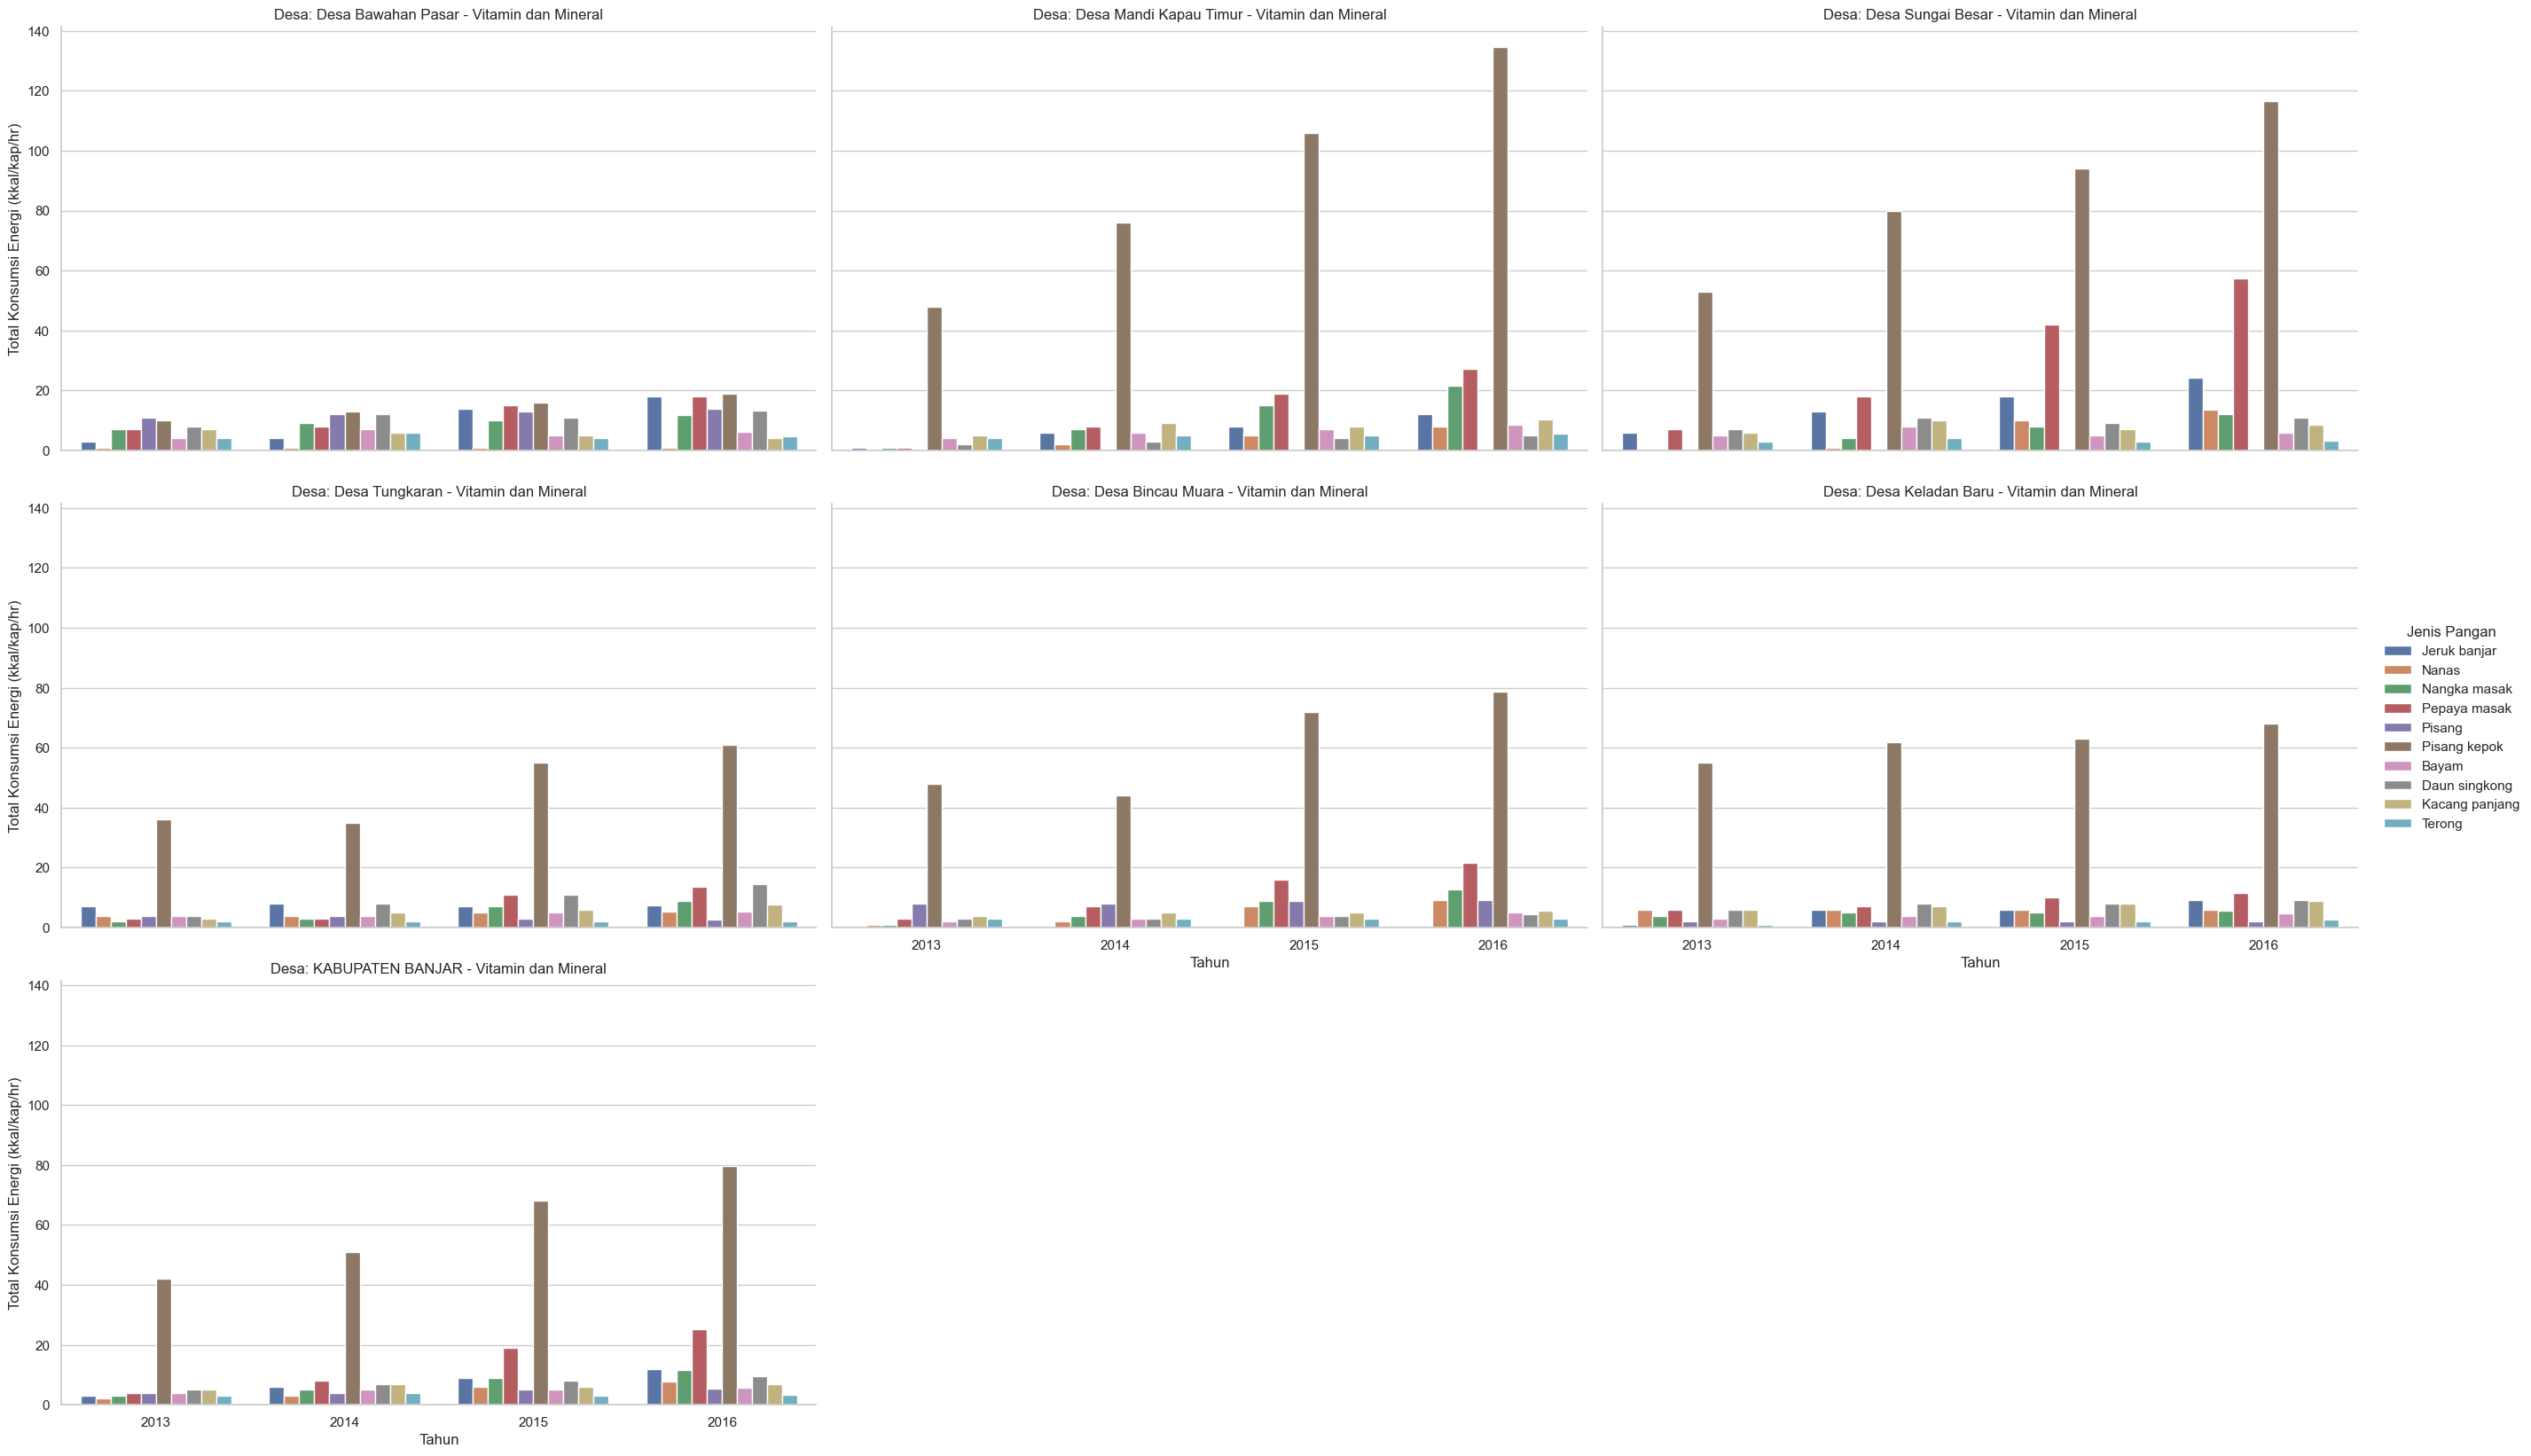

In [37]:
# Mengonversi kolom "Kuantitas Pangan kkal/kap/hr" menjadi numerik
df_all["Kuantitas Pangan kkal/kap/hr"] = pd.to_numeric(df_all["Kuantitas Pangan kkal/kap/hr"], errors="coerce")

# Menghapus baris yang memiliki nilai NaN agar tidak error
df_all = df_all.dropna(subset=["Kuantitas Pangan kkal/kap/hr"])

# Menentukan subset data hanya untuk Vitamin dan Mineral
df_vitamin_mineral = df_all[df_all["Sumber"] == "Vitamin dan Mineral"]

# Memilih 10 jenis pangan utama yang dominan
top_pangan = df_vitamin_mineral.groupby("Jenis Pangan")["Kuantitas Pangan kkal/kap/hr"].sum().nlargest(10).index
df_vitamin_mineral_filtered = df_vitamin_mineral[df_vitamin_mineral["Jenis Pangan"].isin(top_pangan)]

# Prediksi untuk tahun 2016 menggunakan regresi linier
predictions = []
for (wilayah, jenis_pangan), group in df_vitamin_mineral_filtered.groupby(["Wilayah", "Jenis Pangan"]):
    group = group.dropna(subset=["Kuantitas Pangan kkal/kap/hr"])  # Pastikan data tidak kosong
    if group["Tahun"].nunique() > 1:  # Minimal harus ada 2 tahun untuk regresi
        X = group["Tahun"].values.reshape(-1, 1)  # Tahun sebagai variabel independen
        y = group["Kuantitas Pangan kkal/kap/hr"].values  # Konsumsi energi sebagai variabel dependen

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(np.array([[2016]]))  # Prediksi untuk tahun 2016
        predictions.append([wilayah, jenis_pangan, "Vitamin dan Mineral", 2016, y_pred[0]])

# Membuat DataFrame dari hasil prediksi
df_predictions = pd.DataFrame(predictions, columns=["Wilayah", "Jenis Pangan", "Sumber", "Tahun", "Kuantitas Pangan kkal/kap/hr"])

# Menggabungkan data asli dengan prediksi
df_combined = pd.concat([df_vitamin_mineral_filtered, df_predictions], ignore_index=True)

# Membuat visualisasi dengan bar chart yang lebih jelas
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_combined,
    x="Tahun",
    y="Kuantitas Pangan kkal/kap/hr",
    hue="Jenis Pangan",
    col="Wilayah",  # Setiap desa memiliki subplot sendiri
    kind="bar",
    col_wrap=3,  # Membatasi jumlah kolom agar subplot lebih besar
    height=6,  # Ukuran lebih besar untuk keterbacaan
    aspect=1.5,  # Rasio lebih lebar
    errorbar=None
)

g.set_axis_labels("Tahun", "Total Konsumsi Energi (kkal/kap/hr)")
g.set_titles("Desa: {col_name} - Vitamin dan Mineral")
g.legend.set_title("Jenis Pangan")

# Memperbesar legend agar lebih jelas
plt.subplots_adjust(top=0.9)
plt.show()

#### Tabel Vitamin dan Mineral

##### Semua Tahun

In [38]:
# Menyaring data tanpa "Vitamin dan Mineral" dan hanya mengambil kolom yang dibutuhkan
# df_filtered_no_vitamin = df_combined[df_combined["Sumber"] != "Vitamin dan Mineral"]

# Menampilkan tabel untuk masing-masing Jenis Pangan secara terpisah
for jenis_pangan, df_pangan in df_combined.groupby("Jenis Pangan"):
    print(f"\n=== Jenis Pangan: {jenis_pangan} ===")
    display(df_pangan[["Wilayah", "Jenis Pangan", "Kuantitas Pangan kkal/kap/hr", "Tahun"]].reset_index(drop=True))


=== Jenis Pangan: Bayam ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Bayam,4.000000,2013
1,Desa Mandi Kapau Timur,Bayam,4.000000,2013
2,Desa Sungai Besar,Bayam,5.000000,2013
3,Desa Tungkaran,Bayam,4.000000,2013
4,Desa Bincau Muara,Bayam,2.000000,2013
5,Desa Keladan Baru,Bayam,3.000000,2013
6,KABUPATEN BANJAR,Bayam,4.000000,2013
7,Desa Bawahan Pasar,Bayam,7.000000,2014
8,Desa Mandi Kapau Timur,Bayam,6.000000,2014
9,Desa Sungai Besar,Bayam,8.000000,2014



=== Jenis Pangan: Daun singkong ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Daun singkong,8.000000,2013
1,Desa Mandi Kapau Timur,Daun singkong,2.000000,2013
2,Desa Sungai Besar,Daun singkong,7.000000,2013
3,Desa Tungkaran,Daun singkong,4.000000,2013
4,Desa Bincau Muara,Daun singkong,3.000000,2013
5,Desa Keladan Baru,Daun singkong,6.000000,2013
6,KABUPATEN BANJAR,Daun singkong,5.000000,2013
7,Desa Bawahan Pasar,Daun singkong,12.000000,2014
8,Desa Mandi Kapau Timur,Daun singkong,3.000000,2014
9,Desa Sungai Besar,Daun singkong,11.000000,2014



=== Jenis Pangan: Jeruk banjar ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Jeruk banjar,3.000000,2013
1,Desa Mandi Kapau Timur,Jeruk banjar,1.000000,2013
2,Desa Sungai Besar,Jeruk banjar,6.000000,2013
3,Desa Tungkaran,Jeruk banjar,7.000000,2013
4,Desa Keladan Baru,Jeruk banjar,1.000000,2013
5,KABUPATEN BANJAR,Jeruk banjar,3.000000,2013
6,Desa Bawahan Pasar,Jeruk banjar,4.000000,2014
7,Desa Mandi Kapau Timur,Jeruk banjar,6.000000,2014
8,Desa Sungai Besar,Jeruk banjar,13.000000,2014
9,Desa Tungkaran,Jeruk banjar,8.000000,2014



=== Jenis Pangan: Kacang panjang ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang panjang,7.000000,2013
1,Desa Mandi Kapau Timur,Kacang panjang,5.000000,2013
2,Desa Sungai Besar,Kacang panjang,6.000000,2013
3,Desa Tungkaran,Kacang panjang,3.000000,2013
4,Desa Bincau Muara,Kacang panjang,4.000000,2013
5,Desa Keladan Baru,Kacang panjang,6.000000,2013
6,KABUPATEN BANJAR,Kacang panjang,5.000000,2013
7,Desa Bawahan Pasar,Kacang panjang,6.000000,2014
8,Desa Mandi Kapau Timur,Kacang panjang,9.000000,2014
9,Desa Sungai Besar,Kacang panjang,10.000000,2014



=== Jenis Pangan: Nanas ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Nanas,1.000000,2013
1,Desa Sungai Besar,Nanas,0.000000,2013
2,Desa Tungkaran,Nanas,4.000000,2013
3,Desa Bincau Muara,Nanas,1.000000,2013
4,Desa Keladan Baru,Nanas,6.000000,2013
5,KABUPATEN BANJAR,Nanas,2.000000,2013
6,Desa Bawahan Pasar,Nanas,1.000000,2014
7,Desa Mandi Kapau Timur,Nanas,2.000000,2014
8,Desa Sungai Besar,Nanas,1.000000,2014
9,Desa Tungkaran,Nanas,4.000000,2014



=== Jenis Pangan: Nangka masak ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Nangka masak,7.000000,2013
1,Desa Mandi Kapau Timur,Nangka masak,1.000000,2013
2,Desa Sungai Besar,Nangka masak,0.000000,2013
3,Desa Tungkaran,Nangka masak,2.000000,2013
4,Desa Bincau Muara,Nangka masak,1.000000,2013
5,Desa Keladan Baru,Nangka masak,4.000000,2013
6,KABUPATEN BANJAR,Nangka masak,3.000000,2013
7,Desa Bawahan Pasar,Nangka masak,9.000000,2014
8,Desa Mandi Kapau Timur,Nangka masak,7.000000,2014
9,Desa Sungai Besar,Nangka masak,4.000000,2014



=== Jenis Pangan: Pepaya masak ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Pepaya masak,7.000000,2013
1,Desa Mandi Kapau Timur,Pepaya masak,1.000000,2013
2,Desa Sungai Besar,Pepaya masak,7.000000,2013
3,Desa Tungkaran,Pepaya masak,3.000000,2013
4,Desa Bincau Muara,Pepaya masak,3.000000,2013
5,Desa Keladan Baru,Pepaya masak,6.000000,2013
6,KABUPATEN BANJAR,Pepaya masak,4.000000,2013
7,Desa Bawahan Pasar,Pepaya masak,8.000000,2014
8,Desa Mandi Kapau Timur,Pepaya masak,8.000000,2014
9,Desa Sungai Besar,Pepaya masak,18.000000,2014



=== Jenis Pangan: Pisang ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Pisang,11.000000,2013
1,Desa Tungkaran,Pisang,4.000000,2013
2,Desa Bincau Muara,Pisang,8.000000,2013
3,Desa Keladan Baru,Pisang,2.000000,2013
4,KABUPATEN BANJAR,Pisang,4.000000,2013
5,Desa Bawahan Pasar,Pisang,12.000000,2014
6,Desa Tungkaran,Pisang,4.000000,2014
7,Desa Bincau Muara,Pisang,8.000000,2014
8,Desa Keladan Baru,Pisang,2.000000,2014
9,KABUPATEN BANJAR,Pisang,4.000000,2014



=== Jenis Pangan: Pisang kepok ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Pisang kepok,10.000000,2013
1,Desa Mandi Kapau Timur,Pisang kepok,48.000000,2013
2,Desa Sungai Besar,Pisang kepok,53.000000,2013
3,Desa Tungkaran,Pisang kepok,36.000000,2013
4,Desa Bincau Muara,Pisang kepok,48.000000,2013
5,Desa Keladan Baru,Pisang kepok,55.000000,2013
6,KABUPATEN BANJAR,Pisang kepok,42.000000,2013
7,Desa Bawahan Pasar,Pisang kepok,13.000000,2014
8,Desa Mandi Kapau Timur,Pisang kepok,76.000000,2014
9,Desa Sungai Besar,Pisang kepok,80.000000,2014



=== Jenis Pangan: Terong ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Terong,4.000000,2013
1,Desa Mandi Kapau Timur,Terong,4.000000,2013
2,Desa Sungai Besar,Terong,3.000000,2013
3,Desa Tungkaran,Terong,2.000000,2013
4,Desa Bincau Muara,Terong,3.000000,2013
5,Desa Keladan Baru,Terong,1.000000,2013
6,KABUPATEN BANJAR,Terong,3.000000,2013
7,Desa Bawahan Pasar,Terong,6.000000,2014
8,Desa Mandi Kapau Timur,Terong,5.000000,2014
9,Desa Sungai Besar,Terong,4.000000,2014


##### Tahun 2016

In [39]:
# Menyaring hanya data prediksi tahun 2016
df_pred_2016 = df_combined[df_combined["Tahun"] == 2016]

# Menampilkan tabel untuk masing-masing Jenis Pangan secara terpisah
for jenis_pangan, df_pangan in df_pred_2016.groupby("Jenis Pangan"):
    print(f"\n=== Jenis Pangan: {jenis_pangan} (Tahun 2016) ===")
    display(df_pangan[["Wilayah", "Jenis Pangan", "Kuantitas Pangan kkal/kap/hr", "Tahun"]].reset_index(drop=True))



=== Jenis Pangan: Bayam (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Bayam,6.333333,2016
1,Desa Bincau Muara,Bayam,5.000000,2016
2,Desa Keladan Baru,Bayam,4.666667,2016
3,Desa Mandi Kapau Timur,Bayam,8.666667,2016
4,Desa Sungai Besar,Bayam,6.000000,2016
5,Desa Tungkaran,Bayam,5.333333,2016
6,KABUPATEN BANJAR,Bayam,5.666667,2016



=== Jenis Pangan: Daun singkong (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Daun singkong,13.333333,2016
1,Desa Bincau Muara,Daun singkong,4.333333,2016
2,Desa Keladan Baru,Daun singkong,9.333333,2016
3,Desa Mandi Kapau Timur,Daun singkong,5.000000,2016
4,Desa Sungai Besar,Daun singkong,11.000000,2016
5,Desa Tungkaran,Daun singkong,14.666667,2016
6,KABUPATEN BANJAR,Daun singkong,9.666667,2016



=== Jenis Pangan: Jeruk banjar (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Jeruk banjar,18.000000,2016
1,Desa Keladan Baru,Jeruk banjar,9.333333,2016
2,Desa Mandi Kapau Timur,Jeruk banjar,12.000000,2016
3,Desa Sungai Besar,Jeruk banjar,24.333333,2016
4,Desa Tungkaran,Jeruk banjar,7.333333,2016
5,KABUPATEN BANJAR,Jeruk banjar,12.000000,2016



=== Jenis Pangan: Kacang panjang (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Kacang panjang,4.000000,2016
1,Desa Bincau Muara,Kacang panjang,5.666667,2016
2,Desa Keladan Baru,Kacang panjang,9.000000,2016
3,Desa Mandi Kapau Timur,Kacang panjang,10.333333,2016
4,Desa Sungai Besar,Kacang panjang,8.666667,2016
5,Desa Tungkaran,Kacang panjang,7.666667,2016
6,KABUPATEN BANJAR,Kacang panjang,7.000000,2016



=== Jenis Pangan: Nanas (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Nanas,1.000000,2016
1,Desa Bincau Muara,Nanas,9.333333,2016
2,Desa Keladan Baru,Nanas,6.000000,2016
3,Desa Mandi Kapau Timur,Nanas,8.000000,2016
4,Desa Sungai Besar,Nanas,13.666667,2016
5,Desa Tungkaran,Nanas,5.333333,2016
6,KABUPATEN BANJAR,Nanas,7.666667,2016



=== Jenis Pangan: Nangka masak (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Nangka masak,11.666667,2016
1,Desa Bincau Muara,Nangka masak,12.666667,2016
2,Desa Keladan Baru,Nangka masak,5.666667,2016
3,Desa Mandi Kapau Timur,Nangka masak,21.666667,2016
4,Desa Sungai Besar,Nangka masak,12.000000,2016
5,Desa Tungkaran,Nangka masak,9.000000,2016
6,KABUPATEN BANJAR,Nangka masak,11.666667,2016



=== Jenis Pangan: Pepaya masak (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Pepaya masak,18.000000,2016
1,Desa Bincau Muara,Pepaya masak,21.666667,2016
2,Desa Keladan Baru,Pepaya masak,11.666667,2016
3,Desa Mandi Kapau Timur,Pepaya masak,27.333333,2016
4,Desa Sungai Besar,Pepaya masak,57.333333,2016
5,Desa Tungkaran,Pepaya masak,13.666667,2016
6,KABUPATEN BANJAR,Pepaya masak,25.333333,2016



=== Jenis Pangan: Pisang (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Pisang,14.000000,2016
1,Desa Bincau Muara,Pisang,9.333333,2016
2,Desa Keladan Baru,Pisang,2.000000,2016
3,Desa Tungkaran,Pisang,2.666667,2016
4,KABUPATEN BANJAR,Pisang,5.333333,2016



=== Jenis Pangan: Pisang kepok (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Pisang kepok,19.000000,2016
1,Desa Bincau Muara,Pisang kepok,78.666667,2016
2,Desa Keladan Baru,Pisang kepok,68.000000,2016
3,Desa Mandi Kapau Timur,Pisang kepok,134.666667,2016
4,Desa Sungai Besar,Pisang kepok,116.666667,2016
5,Desa Tungkaran,Pisang kepok,61.000000,2016
6,KABUPATEN BANJAR,Pisang kepok,79.666667,2016



=== Jenis Pangan: Terong (Tahun 2016) ===


,Wilayah,Jenis Pangan,Kuantitas Pangan kkal/kap/hr,Tahun
0,Desa Bawahan Pasar,Terong,4.666667,2016
1,Desa Bincau Muara,Terong,3.000000,2016
2,Desa Keladan Baru,Terong,2.666667,2016
3,Desa Mandi Kapau Timur,Terong,5.666667,2016
4,Desa Sungai Besar,Terong,3.333333,2016
5,Desa Tungkaran,Terong,2.000000,2016
6,KABUPATEN BANJAR,Terong,3.333333,2016


# Cluestering

In [ ]:
# Load the uploaded Excel file
file_path = "Dataset PPH for Cluster.xlsx"
xls = pd.ExcelFile(file_path)

# Load data dari sheets
df_2013 = pd.read_excel(xls, sheet_name='Pola Konsumsi (2013)')
df_2014 = pd.read_excel(xls, sheet_name='Pola Konsumsi (2014)')
df_2015 = pd.read_excel(xls, sheet_name='Pola Konsumsi (2015)')

## 3 Tahun

c:\AppElizabeth\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


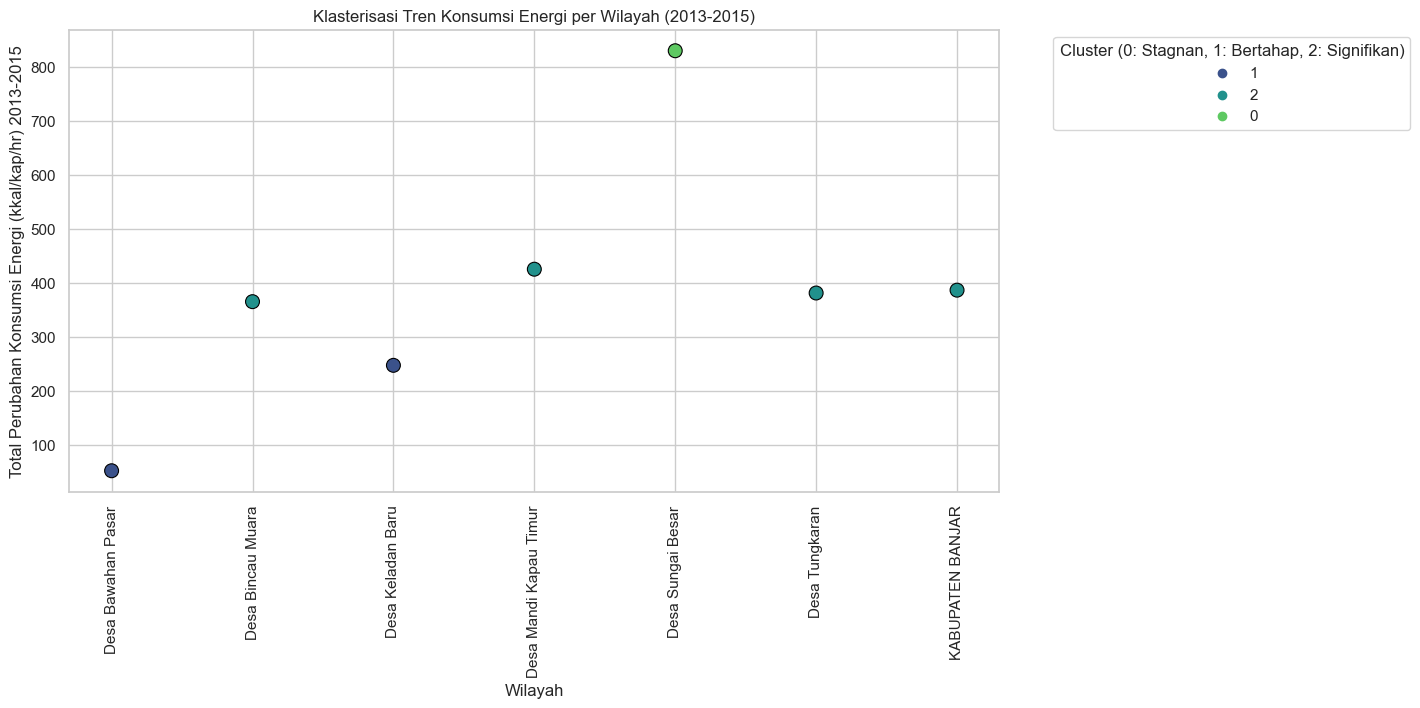

In [53]:
# Gabungkan semua tahun menjadi satu DataFrame
df_all_year = pd.concat([df_2013, df_2014, df_2015], ignore_index=True)

# Konversi kolom Kuantitas Pangan kkal/kap/hr ke numerik
df_all_year["Kuantitas Pangan kkal/kap/hr"] = pd.to_numeric(df_all_year["Kuantitas Pangan kkal/kap/hr"], errors="coerce")

# Pivot data untuk melihat perubahan konsumsi per Wilayah dari tahun ke tahun
df_pivot = df_all_year.pivot_table(index="Wilayah", columns="Tahun", values="Kuantitas Pangan kkal/kap/hr", aggfunc="sum").reset_index()

# Hitung perubahan konsumsi energi dari tahun ke tahun
df_pivot["Change_2013_2014"] = df_pivot[2014] - df_pivot[2013]
df_pivot["Change_2014_2015"] = df_pivot[2015] - df_pivot[2014]
df_pivot["Total_Change"] = df_pivot[2015] - df_pivot[2013]

# Klasterisasi berdasarkan pola perubahan konsumsi
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pivot["Cluster"] = kmeans.fit_predict(df_pivot[["Change_2013_2014", "Change_2014_2015", "Total_Change"]])

# Visualisasi hasil klasterisasi
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_pivot, 
    x="Wilayah", 
    y="Total_Change", 
    hue=df_pivot["Cluster"].astype(str),  # Konversi klaster ke string agar bisa ditampilkan sebagai kategori
    palette="viridis", 
    edgecolor="black", 
    s=100
)

plt.xticks(rotation=90)
plt.xlabel("Wilayah")
plt.ylabel("Total Perubahan Konsumsi Energi (kkal/kap/hr) 2013-2015")
plt.title("Klasterisasi Tren Konsumsi Energi per Wilayah (2013-2015)")

# Menempatkan legend di luar grafik
plt.legend(title="Cluster (0: Stagnan, 1: Bertahap, 2: Signifikan)", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(True)
plt.show()

In [52]:
df_pivot

Tahun,Wilayah,2013,2014,2015,Change_2013_2014,Change_2014_2015,Total_Change,Cluster
0,Desa Bawahan Pasar,1363.5,1413.0,1416.0,49.5,3.0,52.5,1
1,Desa Bincau Muara,1081.4,1186.0,1447.0,104.6,261.0,365.6,2
2,Desa Keladan Baru,1381.3,1537.0,1629.0,155.7,92.0,247.7,1
3,Desa Mandi Kapau Timur,1108.3,1255.0,1534.0,146.7,279.0,425.7,2
4,Desa Sungai Besar,985.8,1277.0,1816.0,291.2,539.0,830.2,0
5,Desa Tungkaran,1155.4,1197.0,1537.0,41.6,340.0,381.6,2
6,KABUPATEN BANJAR,1179.1,1304.0,1566.0,124.9,262.0,386.9,2
